In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

pd.set_option('display.max_columns', None)

pd.options.display.max_columns=999

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [18]:
Salaries = pd.read_csv('ASA_Salaries_2021.csv')
Salaries

,Unnamed: 0,Player,Team,Season,Position,Base Salary,Guaranteed Compensation,Date
0,NaN,Carlos Vela,LAFC,2021,F,"$4,500,000","$6,300,000",2021-09-30
1,NaN,Chicharito,LAG,2021,F,"$6,000,000","$6,000,000",2021-09-30
2,NaN,Gonzalo Higuaín,MIA,2021,F,"$5,100,000","$5,793,750",2021-09-30
3,NaN,Alejandro Pozuelo,TOR,2021,M,"$3,800,000","$4,693,000",2021-09-30
4,NaN,Luiz Araújo,ATL,2021,F,"$3,600,000","$3,941,670",2021-09-30
...,...,...,...,...,...,...,...,...
846,NaN,Nabilai Kibunguchy,MIN,2021,F,"$63,547","$63,547",2021-09-30
847,NaN,David Egbo,VAN,2021,F,"$63,547","$63,547",2021-09-30
848,NaN,Daniel Aguirre,LAG,2021,M,"$63,547","$63,547",2021-09-30
849,NaN,Machop Chol,ATL,2021,M,"$63,547","$63,547",2021-09-30


In [19]:
Salaries2021 = Salaries.sort_values(by='Date', ascending=False)
Salaries2021['GuarComp_int'] = np.nan # conver $x,xxx,xxx strings to ints
for i in Salaries2021.index:
    Salaries2021['GuarComp_int'][i] = int(Salaries2021['Guaranteed Compensation'][i].replace('$','').replace(',',''))
Salaries2021 = Salaries2021.sort_values(by='GuarComp_int', ascending=False).reset_index(drop=True)
Salaries2021['Player'] = Salaries2021['Player'].apply(unidecode) # remove accents and such from names - makes matching with other sources easier
Salaries2021

,Unnamed: 0,Player,Team,Season,Position,Base Salary,Guaranteed Compensation,Date,GuarComp_int
0,NaN,Carlos Vela,LAFC,2021,F,"$4,500,000","$6,300,000",2021-09-30,6300000.0
1,NaN,Chicharito,LAG,2021,F,"$6,000,000","$6,000,000",2021-09-30,6000000.0
2,NaN,Gonzalo Higuain,MIA,2021,F,"$5,100,000","$5,793,750",2021-09-30,5793750.0
3,NaN,Alejandro Pozuelo,TOR,2021,M,"$3,800,000","$4,693,000",2021-09-30,4693000.0
4,NaN,Luiz Araujo,ATL,2021,F,"$3,600,000","$3,941,670",2021-09-30,3941670.0
...,...,...,...,...,...,...,...,...,...
846,NaN,Jackson Conway,ATL,2021,F,"$63,547","$63,547",2021-09-30,63547.0
847,NaN,Ian Fray,MIA,2021,D,"$63,547","$63,547",2021-09-30,63547.0
848,NaN,Felipe Valencia,MIA,2021,F,"$63,547","$63,547",2021-09-30,63547.0
849,NaN,Joshua Penn,MIA,2021,M,"$63,547","$63,547",2021-09-30,63547.0


In [20]:
GoalsAdded = pd.read_excel('ASA_G+_2021.xlsx', header=2)
GoalsAdded['Player'] = GoalsAdded['Player'].apply(unidecode) # again, remove accents from names
GoalsAdded['GAp96'] = GoalsAdded['Goals Added'] / (GoalsAdded['Minutes']/96) # create p96 stats, although I think those can be downloaded straight from americansocceranalysis.com
GoalsAdded

,Unnamed: 0,Player,Team,Season,Position,Minutes,Goals Added,GAp96
0,NaN,Adam Buksa,NER,2021,ST,2282,10.25,0.431201
1,NaN,Andreu Fontas,SKC,2021,CB,3264,9.84,0.289412
2,NaN,Carles Gil,NER,2021,AM,2490,9.34,0.360096
3,NaN,Cristian Roldan,SEA,2021,AM,2581,8.78,0.326571
4,NaN,Marcelino Moreno,ATL,2021,CM,2799,8.59,0.294620
...,...,...,...,...,...,...,...,...
661,NaN,Luis Caicedo,NER,2021,CM,210,-0.06,-0.027429
662,NaN,Tyler Wolff,ATL,2021,CM,257,-0.07,-0.026148
663,NaN,Roberto Puncec,SKC,2021,CB,140,-0.13,-0.089143
664,NaN,Erik Sorga,DCU,2021,ST,265,-0.18,-0.065208


In [22]:
# Goalkeeper g+ is a different thing than field player g+, so store in different dataframes
GoalsAdded_GK = pd.read_excel('ASA_GK_G+_2021.xlsx', header=2) # do the same for goalkeepers
GoalsAdded_GK['Player'] = GoalsAdded_GK['Player'].apply(unidecode)
GoalsAdded_GK['GAp96'] = GoalsAdded_GK['Goals Added'] / (GoalsAdded_GK['Minutes']/96)
GoalsAdded_GK

,Unnamed: 0,Player,Team,Season,Minutes,Goals Added,GAp96
0,NaN,Matt Turner,NER,2021,2752,10.97,0.382674
1,NaN,Andre Blake,PHI,2021,2585,10.09,0.374716
2,NaN,JT Marcinkowski,SJE,2021,3292,9.02,0.263038
3,NaN,Maxime Crepeau,VAN,2021,2684,8.10,0.289717
4,NaN,Steve Clark,POR,2021,2319,6.94,0.287296
...,...,...,...,...,...,...,...
60,NaN,Jon Kempin,DCU,2021,978,-4.36,-0.427975
61,NaN,James Pantemis,MTL,2021,1783,-4.54,-0.244442
62,NaN,Tomas Romero,LAFC,2021,1799,-4.55,-0.242802
63,NaN,Michael Nelson,HOU,2021,1086,-5.11,-0.451713


In [364]:
# Load unprotected players csv, data hand-copied from article on MLSSoccer.com
Unprotected_Players = pd.read_csv('UnprotectedPlayers.csv')
Unprotected_Players['Player'] = Unprotected_Players['Player'].apply(unidecode)
Unprotected_Players = Unprotected_Players[~pd.isna(Unprotected_Players['Name_ASA'])]
Unprotected_Players[['Pos', 'Min', 'g+/90', 'Salary']] = np.nan # get the g+ data into this table so we're not dealing with multiple dataframes
for i in Unprotected_Players.index:
    name_asa = Unprotected_Players['Name_ASA'][i]
    if (name_asa in list(GoalsAdded['Player'])):
        Unprotected_Players['Pos'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['Position'].iloc[0]
        Unprotected_Players['Min'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['Minutes'].iloc[0]
        Unprotected_Players['g+/90'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['GAp96'].iloc[0]
        Unprotected_Players['Salary'][i] = Salaries2021[Salaries2021['Player'] == name_asa]['GuarComp_int']
    elif (name_asa in list(GoalsAdded_GK['Player'])):
        Unprotected_Players['Pos'][i] = 'GK'
        Unprotected_Players['Min'][i] = GoalsAdded_GK[GoalsAdded_GK['Player'] == name_asa]['Minutes'].iloc[0]
        Unprotected_Players['g+/90'][i] = GoalsAdded_GK[GoalsAdded_GK['Player'] == name_asa]['GAp96'].iloc[0]
        Unprotected_Players['Salary'][i] = Salaries2021[Salaries2021['Player'] == name_asa]['GuarComp_int']
Unprotected_Players['Value'] = (Unprotected_Players['g+/90'] / Unprotected_Players['Salary']) * 100000 # create value metric: g+/96 per 100k salary
Unprotected_Players = Unprotected_Players.sort_values(by='g+/90', ascending=False).reset_index(drop=True)
Unprotected_Players

,Team,Player,Player_Name,Name_ASA,Pos,Min,g+/90,Salary,Value
0,PHI,"Bendik, Joseph",Joseph Bendik,Joe Bendik,GK,238.0,0.564706,200000.0,0.282353
1,ATL,"Kann, Alec",Alec Kann,Alec Kann,GK,495.0,0.508121,115000.0,0.441845
2,SEA,"Richey, Spencer",Spencer Richey,Spencer Richey,GK,196.0,0.288980,81375.0,0.355121
3,POR,"Clark, Steven",Steven Clark,Steve Clark,GK,2319.0,0.212781,250000.0,0.085113
4,HOU,"Quintero, Darwin",Darwin Quintero,Darwin Quintero,AM,1137.0,0.128338,1352060.0,0.009492
...,...,...,...,...,...,...,...,...,...
204,CLB,"Bush, Evan",Evan Bush,Evan Bush,GK,396.0,-0.700606,438667.0,-0.159713
205,DCU,"Seitz, Chris",Chris Seitz,Chris Seitz,GK,389.0,-0.708278,160000.0,-0.442674
206,HOU,"Morton, Kyle",Kyle Morton,Kyle Morton,GK,94.0,-1.092766,81375.0,-1.342877
207,ATX,"Tarbell, Andrew",Andrew Tarbell,Andrew Tarbell,GK,97.0,-1.187629,283333.0,-0.419164


In [170]:
Unprotected_Players['Name_Short'] = np.nan # create a shortened name (Firstname Lastname --> F. Lastname) for viz labels
for i in Unprotected_Players.index:
    name = Unprotected_Players['Name_ASA'][i]
    name = name.split(' ')
    if (len(name) > 1):
        Unprotected_Players['Name_Short'][i] = name[0][0] + '. ' + name[1]
    elif (len(name) == 0):
        Unprotected_Players['Name_Short'][i] = Unprotected_Players['Name_ASA'][i]
Unprotected_Players

,Team,Player,Player_Name,Name_ASA,Pos,Min,g+/90,Salary,Value,Name_Short
0,PHI,"Bendik, Joseph",Joseph Bendik,Joe Bendik,GK,238.0,0.564706,200000.0,0.282353,J. Bendik
1,ATL,"Kann, Alec",Alec Kann,Alec Kann,GK,495.0,0.508121,115000.0,0.441845,A. Kann
2,SEA,"Richey, Spencer",Spencer Richey,Spencer Richey,GK,196.0,0.288980,81375.0,0.355121,S. Richey
3,POR,"Clark, Steven",Steven Clark,Steve Clark,GK,2319.0,0.212781,250000.0,0.085113,S. Clark
4,HOU,"Quintero, Darwin",Darwin Quintero,Darwin Quintero,AM,1137.0,0.128338,1352060.0,0.009492,D. Quintero
...,...,...,...,...,...,...,...,...,...,...
204,CLB,"Bush, Evan",Evan Bush,Evan Bush,GK,396.0,-0.700606,438667.0,-0.159713,E. Bush
205,DCU,"Seitz, Chris",Chris Seitz,Chris Seitz,GK,389.0,-0.708278,160000.0,-0.442674,C. Seitz
206,HOU,"Morton, Kyle",Kyle Morton,Kyle Morton,GK,94.0,-1.092766,81375.0,-1.342877,K. Morton
207,ATX,"Tarbell, Andrew",Andrew Tarbell,Andrew Tarbell,GK,97.0,-1.187629,283333.0,-0.419164,A. Tarbell


In [257]:
# read in the 2021 free agents - csv hand-copied from MLS Players Association website
FA_List = pd.read_csv('FA_List_2022.csv')

Aaron Schoenfeld
Kortne Ford
Felipe Martins
David Accam
Alex Muy
llie Sanchez
Adam Jahn
Ike Opara
Oscar Boniek Garcia
Maxi Moralez
nan
Aurelien Collin


In [312]:
# create a df with players that make the minute cutoff
Cleaned = Unprotected_Players[Unprotected_Players['Min'] >= 500].sort_values(by='g+/90', ascending=False) 
Cleaned_noGK = Unprotected_Players[(Unprotected_Players['Pos'] != 'GK') & (Unprotected_Players['Min'] >= 500)].sort_values(by='g+/90', ascending=False)
Cleaned_noGK

,Team,Player,Player_Name,Name_ASA,Pos,Min,g+/90,Salary,Value,Name_Short
4,HOU,"Quintero, Darwin",Darwin Quintero,Darwin Quintero,AM,1137.0,0.128338,1352060.0,0.009492,D. Quintero
5,CHI,"Calvo, Francisco",Francisco Calvo,Francisco Calvo,CB,1613.0,0.070825,902600.0,0.007847,F. Calvo
6,CHI,"Medran, Alvaro",Alvaro Medran,Alvaro Medran,CM,2488.0,0.067910,1055000.0,0.006437,A. Medran
8,MIN,"Metanire, Romain",Romain Metanire,Romain Metanire,FB,2785.0,0.057566,699250.0,0.008232,R. Metanire
9,SKC,"Sanchez, Ilie",Ilie Sanchez,Ilie Sanchez,CB,2761.0,0.052850,1000000.0,0.005285,I. Sanchez
...,...,...,...,...,...,...,...,...,...,...
177,FCD,"Vargas, Freddy",Freddy Vargas,Freddy Vargas,W,607.0,-0.173970,186000.0,-0.093532,F. Vargas
180,ATL,"Lopez, Erik",Erik Lopez,Erik Lopez,W,960.0,-0.181000,508300.0,-0.035609,E. Lopez
184,TOR,"Mullins, Patrick",Patrick Mullins,Patrick Mullins,ST,901.0,-0.207769,248329.0,-0.083667,P. Mullins
187,TOR,"Dwyer, Dom",Dom Dwyer,Dom Dwyer,ST,555.0,-0.214486,81375.0,-0.263578,D. Dwyer


In [313]:
# indicate free agents in the cleaned df
Cleaned_noGK['FA'] = False
Cleaned['FA'] = False
for i in Cleaned_noGK.index:
    name = Cleaned_noGK['Name_ASA'][i]
    if (name in list(FA_List['Name_ASA'])):
        Cleaned_noGK['FA'][i] = True
        Cleaned['FA'][i] = True
nonFA_Cleaned = Cleaned[~Cleaned['FA']]
nonFA_Unprotected = Cleaned_noGK[~Cleaned_noGK['FA']]
nonFA_Unprotected

,Team,Player,Player_Name,Name_ASA,Pos,Min,g+/90,Salary,Value,Name_Short,FA
4,HOU,"Quintero, Darwin",Darwin Quintero,Darwin Quintero,AM,1137.0,0.128338,1352060.0,0.009492,D. Quintero,False
6,CHI,"Medran, Alvaro",Alvaro Medran,Alvaro Medran,CM,2488.0,0.067910,1055000.0,0.006437,A. Medran,False
8,MIN,"Metanire, Romain",Romain Metanire,Romain Metanire,FB,2785.0,0.057566,699250.0,0.008232,R. Metanire,False
9,SKC,"Sanchez, Ilie",Ilie Sanchez,Ilie Sanchez,CB,2761.0,0.052850,1000000.0,0.005285,I. Sanchez,False
10,NYC,"Moralez, Maximiliano",Maximiliano Moralez,Maximiliano Moralez,AM,2616.0,0.050642,3285000.0,0.001542,M. Moralez,False
...,...,...,...,...,...,...,...,...,...,...,...
157,HOU,"Lassiter, Ariel",Ariel Lassiter,Ariel Lassiter,ST,632.0,-0.126076,230280.0,-0.054749,A. Lassiter,False
173,MTL,"Johnsen, Bjorn",Bjorn Johnsen,Bjorn Maars Johnsen,ST,1028.0,-0.163424,1036670.0,-0.015764,B. Maars,False
177,FCD,"Vargas, Freddy",Freddy Vargas,Freddy Vargas,W,607.0,-0.173970,186000.0,-0.093532,F. Vargas,False
180,ATL,"Lopez, Erik",Erik Lopez,Erik Lopez,W,960.0,-0.181000,508300.0,-0.035609,E. Lopez,False


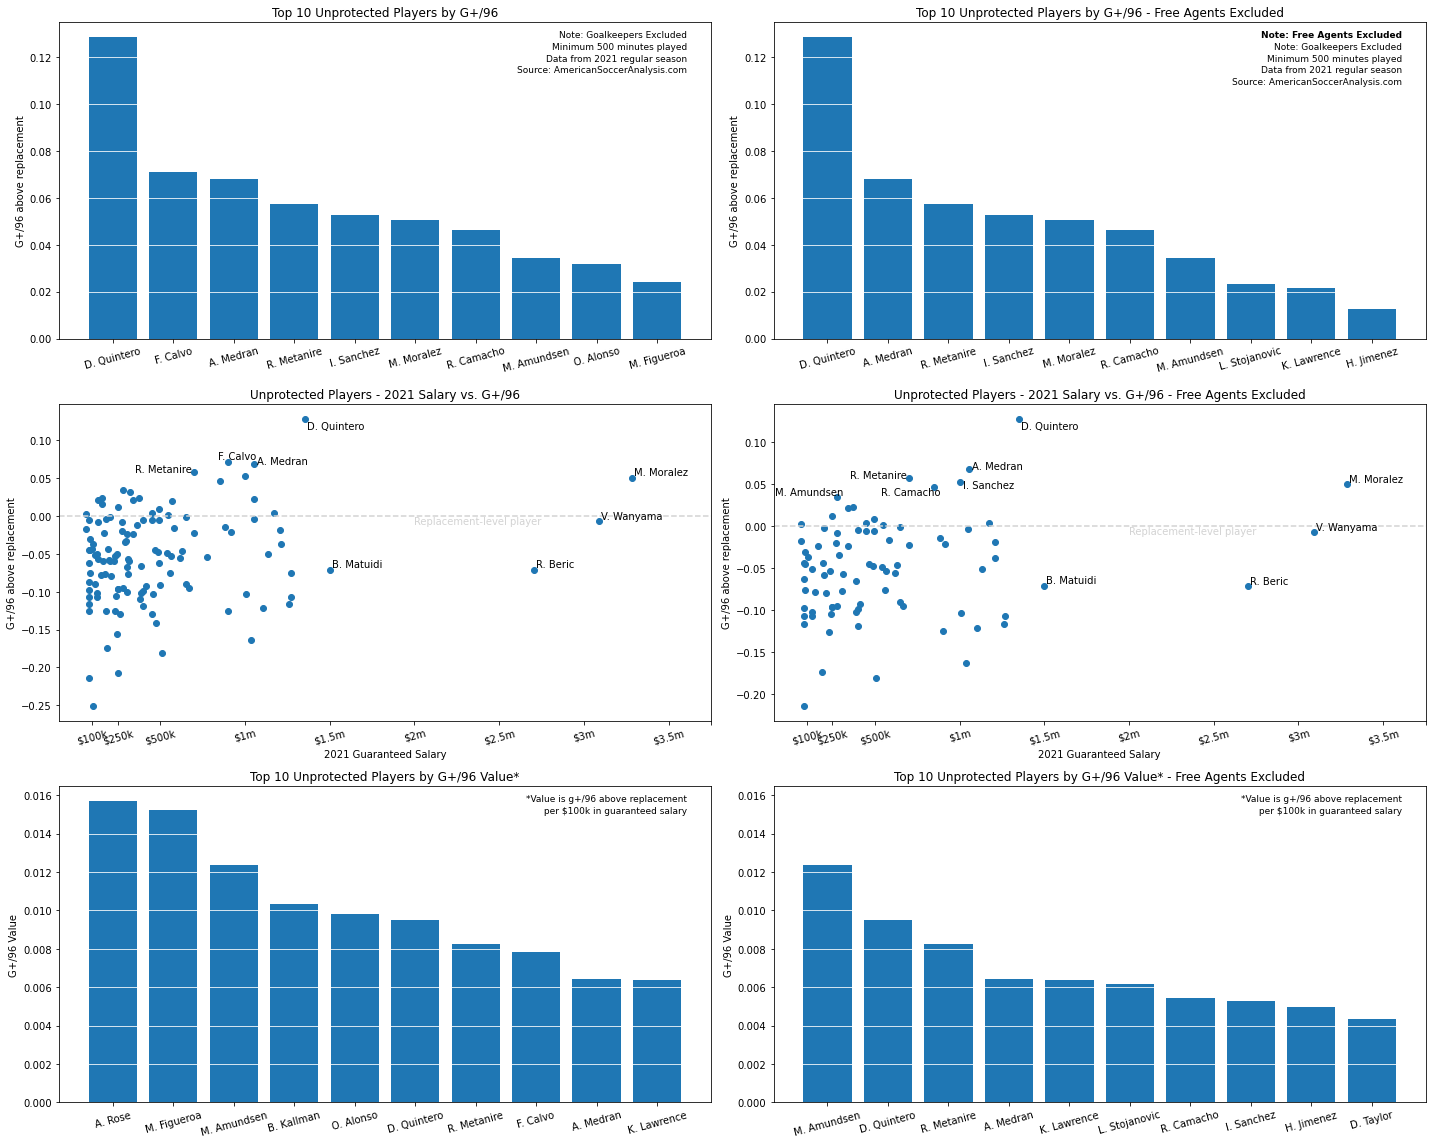

In [326]:
fig, ax = plt.subplots(3,2, figsize=(20,16))
xlocs = list(range(10))

ax[0,0].bar(x=xlocs, height=Cleaned_noGK['g+/90'][:10])
ax[0,0].set_xticks(xlocs)
ax[0,0].set_xticklabels(list(Cleaned_noGK['Name_Short'][:10]), rotation=15)
ax[0,0].set_ylabel('G+/96 above replacement')
ax[0,0].grid(axis='y', color='white') # invisible grid that goes through bars
ax[0,0].set_title('Top 10 Unprotected Players by G+/96')
# add notes to top right corner of plot
ax[0,0].text(x=9.5, y=Cleaned_noGK['g+/90'].max(), s='Note: Goalkeepers Excluded',
             horizontalalignment='right', fontsize=9)
ax[0,0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.005, s='Minimum 500 minutes played',
             horizontalalignment='right', fontsize=9)
ax[0,0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.01, s='Data from 2021 regular season',
             horizontalalignment='right', fontsize=9)
ax[0,0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.015, s='Source: AmericanSoccerAnalysis.com',
           horizontalalignment='right', fontsize=9)


ax[1,0].scatter(x=Cleaned_noGK['Salary'], y=Cleaned_noGK['g+/90'])
ax[1,0].axhline(y=0, color='lightgray', linestyle='--')
ax[1,0].text(x=2000000, y=0, s='Replacement-level player', verticalalignment='top', color='lightgray')
ax[1,0].set_yscale('linear')
ax[1,0].set_xticks([100000,250000,500000,1000000,1500000,2000000,2500000,3000000,3500000, 3750000]) # extra tick to add space on right of plot
ax[1,0].set_xticklabels(['$100k','$250k','$500k','$1m','$1.5m','$2m','$2.5m','$3m','$3.5m', ''], rotation=15)
ax[1,0].set_ylabel('G+/96 above replacement')
ax[1,0].set_xlabel('2021 Guaranteed Salary')
ax[1,0].set_title('Unprotected Players - 2021 Salary vs. G+/96')
salary_sorted = Cleaned_noGK.sort_values(by='Salary', ascending=False) # to find outlier players easier
value_sorted = Cleaned_noGK.sort_values(by='Value', ascending=False) # to find outlier players easier
# annotate a selection of players in the scatter plot
ax[1,0].annotate(salary_sorted['Name_Short'].iloc[0], xy=(salary_sorted['Salary'].iloc[0],salary_sorted['g+/90'].iloc[0]), xytext=(2,2),  textcoords='offset points')
ax[1,0].annotate(salary_sorted['Name_Short'].iloc[1], xy=(salary_sorted['Salary'].iloc[1],salary_sorted['g+/90'].iloc[1]), xytext=(2,2),  textcoords='offset points')
ax[1,0].annotate(salary_sorted['Name_Short'].iloc[2], xy=(salary_sorted['Salary'].iloc[2],salary_sorted['g+/90'].iloc[2]), xytext=(2,2),  textcoords='offset points')
ax[1,0].annotate(salary_sorted['Name_Short'].iloc[3], xy=(salary_sorted['Salary'].iloc[3],salary_sorted['g+/90'].iloc[3]), xytext=(2,2),  textcoords='offset points')
ax[1,0].annotate(Cleaned_noGK['Name_Short'].iloc[0],  xy=(Cleaned_noGK['Salary'].iloc[0],Cleaned_noGK['g+/90'].iloc[0]),   xytext=(2,-10),textcoords='offset points')
ax[1,0].annotate(Cleaned_noGK['Name_Short'].iloc[1],  xy=(Cleaned_noGK['Salary'].iloc[1],Cleaned_noGK['g+/90'].iloc[1]),   xytext=(-10,3), textcoords='offset points')
ax[1,0].annotate(Cleaned_noGK['Name_Short'].iloc[2],  xy=(Cleaned_noGK['Salary'].iloc[2],Cleaned_noGK['g+/90'].iloc[2]),   xytext=(3,0),   textcoords='offset points')
ax[1,0].annotate(Cleaned_noGK['Name_Short'].iloc[3],  xy=(Cleaned_noGK['Salary'].iloc[3],Cleaned_noGK['g+/90'].iloc[3]),   xytext=(-2,0),  textcoords='offset points', horizontalalignment='right')




ax[2,0].bar(x=xlocs, height=value_sorted['Value'][:10])
ax[2,0].set_xticks(xlocs)
ax[2,0].set_xticklabels(list(value_sorted['Name_Short'][:10]), rotation=15)
ax[2,0].set_ylabel('G+/96 Value')
ax[2,0].grid(axis='y', color='white')
ax[2,0].set_title('Top 10 Unprotected Players by G+/96 Value*')
ax[2,0].text(x=9.5, y=value_sorted['Value'].iloc[0], s='*Value is g+/96 above replacement',
           horizontalalignment='right', fontsize=9)
ax[2,0].text(x=9.5, y=value_sorted['Value'].iloc[0]-0.0006, s=' per $100k in guaranteed salary',
           horizontalalignment='right', fontsize=9)


## Do everything that was above, but using the nonFreeAgent df
ax[0,1].bar(x=xlocs, height=nonFA_Unprotected['g+/90'][:10])
ax[0,1].set_xticks(xlocs)
ax[0,1].set_xticklabels(list(nonFA_Unprotected['Name_Short'][:10]), rotation=15)
ax[0,1].set_ylim(ax[0,0].get_ylim())
ax[0,1].set_ylabel('G+/96 above replacement')
ax[0,1].grid(axis='y', color='white')
ax[0,1].set_title('Top 10 Unprotected Players by G+/96 - Free Agents Excluded')
ax[0,1].text(x=9.5, y=nonFA_Unprotected['g+/90'].max(), s='Note: Free Agents Excluded',
             horizontalalignment='right', fontsize=9, weight='bold')
ax[0,1].text(x=9.5, y=nonFA_Unprotected['g+/90'].max()-0.005, s='Note: Goalkeepers Excluded',
             horizontalalignment='right', fontsize=9)
ax[0,1].text(x=9.5, y=nonFA_Unprotected['g+/90'].max()-0.010, s='Minimum 500 minutes played',
             horizontalalignment='right', fontsize=9)
ax[0,1].text(x=9.5, y=nonFA_Unprotected['g+/90'].max()-0.015, s='Data from 2021 regular season',
             horizontalalignment='right', fontsize=9)
ax[0,1].text(x=9.5, y=nonFA_Unprotected['g+/90'].max()-0.020, s='Source: AmericanSoccerAnalysis.com',
           horizontalalignment='right', fontsize=9)


ax[1,1].scatter(x=nonFA_Unprotected['Salary'], y=nonFA_Unprotected['g+/90'])
ax[1,1].axhline(y=0, color='lightgray', linestyle='--')
ax[1,1].text(x=2000000, y=0, s='Replacement-level player', verticalalignment='top', color='lightgray')
ax[1,1].set_yscale('linear')
ax[1,1].set_xticks([100000,250000,500000,1000000,1500000,2000000,2500000,3000000,3500000, 3750000])
ax[1,1].set_xticklabels(['$100k','$250k','$500k','$1m','$1.5m','$2m','$2.5m','$3m','$3.5m', ''], rotation=15)
ax[1,1].set_ylabel('G+/96 above replacement')
ax[1,1].set_xlabel('2021 Guaranteed Salary')
ax[1,1].set_title('Unprotected Players - 2021 Salary vs. G+/96 - Free Agents Excluded')
nonfa_salary_sorted = nonFA_Unprotected.sort_values(by='Salary', ascending=False)
nonfa_value_sorted = nonFA_Unprotected.sort_values(by='Value', ascending=False)
ax[1,1].annotate(nonfa_salary_sorted['Name_Short'].iloc[0], xy=(nonfa_salary_sorted['Salary'].iloc[0],nonfa_salary_sorted['g+/90'].iloc[0]), xytext=(2,2),  textcoords='offset points')
ax[1,1].annotate(nonfa_salary_sorted['Name_Short'].iloc[1], xy=(nonfa_salary_sorted['Salary'].iloc[1],nonfa_salary_sorted['g+/90'].iloc[1]), xytext=(2,2),  textcoords='offset points')
ax[1,1].annotate(nonfa_salary_sorted['Name_Short'].iloc[2], xy=(nonfa_salary_sorted['Salary'].iloc[2],nonfa_salary_sorted['g+/90'].iloc[2]), xytext=(2,2),  textcoords='offset points')
ax[1,1].annotate(nonfa_salary_sorted['Name_Short'].iloc[3], xy=(nonfa_salary_sorted['Salary'].iloc[3],nonfa_salary_sorted['g+/90'].iloc[3]), xytext=(2,2),  textcoords='offset points')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[0],  xy=(nonFA_Unprotected['Salary'].iloc[0],nonFA_Unprotected['g+/90'].iloc[0]),   xytext=(2,-10),textcoords='offset points')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[1],  xy=(nonFA_Unprotected['Salary'].iloc[1],nonFA_Unprotected['g+/90'].iloc[1]),   xytext=(3,0),   textcoords='offset points')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[2],  xy=(nonFA_Unprotected['Salary'].iloc[2],nonFA_Unprotected['g+/90'].iloc[2]),   xytext=(-2,0),  textcoords='offset points', horizontalalignment='right')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[3],  xy=(nonFA_Unprotected['Salary'].iloc[3],nonFA_Unprotected['g+/90'].iloc[3]),   xytext=(3,-6),  textcoords='offset points')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[5],  xy=(nonFA_Unprotected['Salary'].iloc[5],nonFA_Unprotected['g+/90'].iloc[5]),   xytext=(6,-8),  textcoords='offset points', horizontalalignment='right')
ax[1,1].annotate(nonFA_Unprotected['Name_Short'].iloc[6],  xy=(nonFA_Unprotected['Salary'].iloc[6],nonFA_Unprotected['g+/90'].iloc[6]),   xytext=(6,2),  textcoords='offset points', horizontalalignment='right')




ax[2,1].bar(x=xlocs, height=nonfa_value_sorted['Value'][:10])
ax[2,1].set_xticks(xlocs)
ax[2,1].set_xticklabels(list(nonfa_value_sorted['Name_Short'][:10]), rotation=15)
ax[2,1].set_ylim(ax[2,0].get_ylim())
ax[2,1].set_ylabel('G+/96 Value')
ax[2,1].grid(axis='y', color='white')
ax[2,1].set_title('Top 10 Unprotected Players by G+/96 Value* - Free Agents Excluded')
ax[2,1].text(x=9.5, y=value_sorted['Value'].iloc[0], s='*Value is g+/96 above replacement',
           horizontalalignment='right', fontsize=9)
ax[2,1].text(x=9.5, y=value_sorted['Value'].iloc[0]-0.0006, s=' per $100k in guaranteed salary',
           horizontalalignment='right', fontsize=9)




plt.tight_layout()

plt.savefig('Charlotte_Expansion_2022_plot.png', dpi=250)

In [366]:
Cleaned['Pos'].unique() # checking the list of positions present
#['ST', 'W', 'AM', 'CM', 'DM', 'FB', 'CB', 'GK']

array(['GK', 'AM', 'CB', 'CM', 'FB', 'DM', 'W', 'ST'], dtype=object)

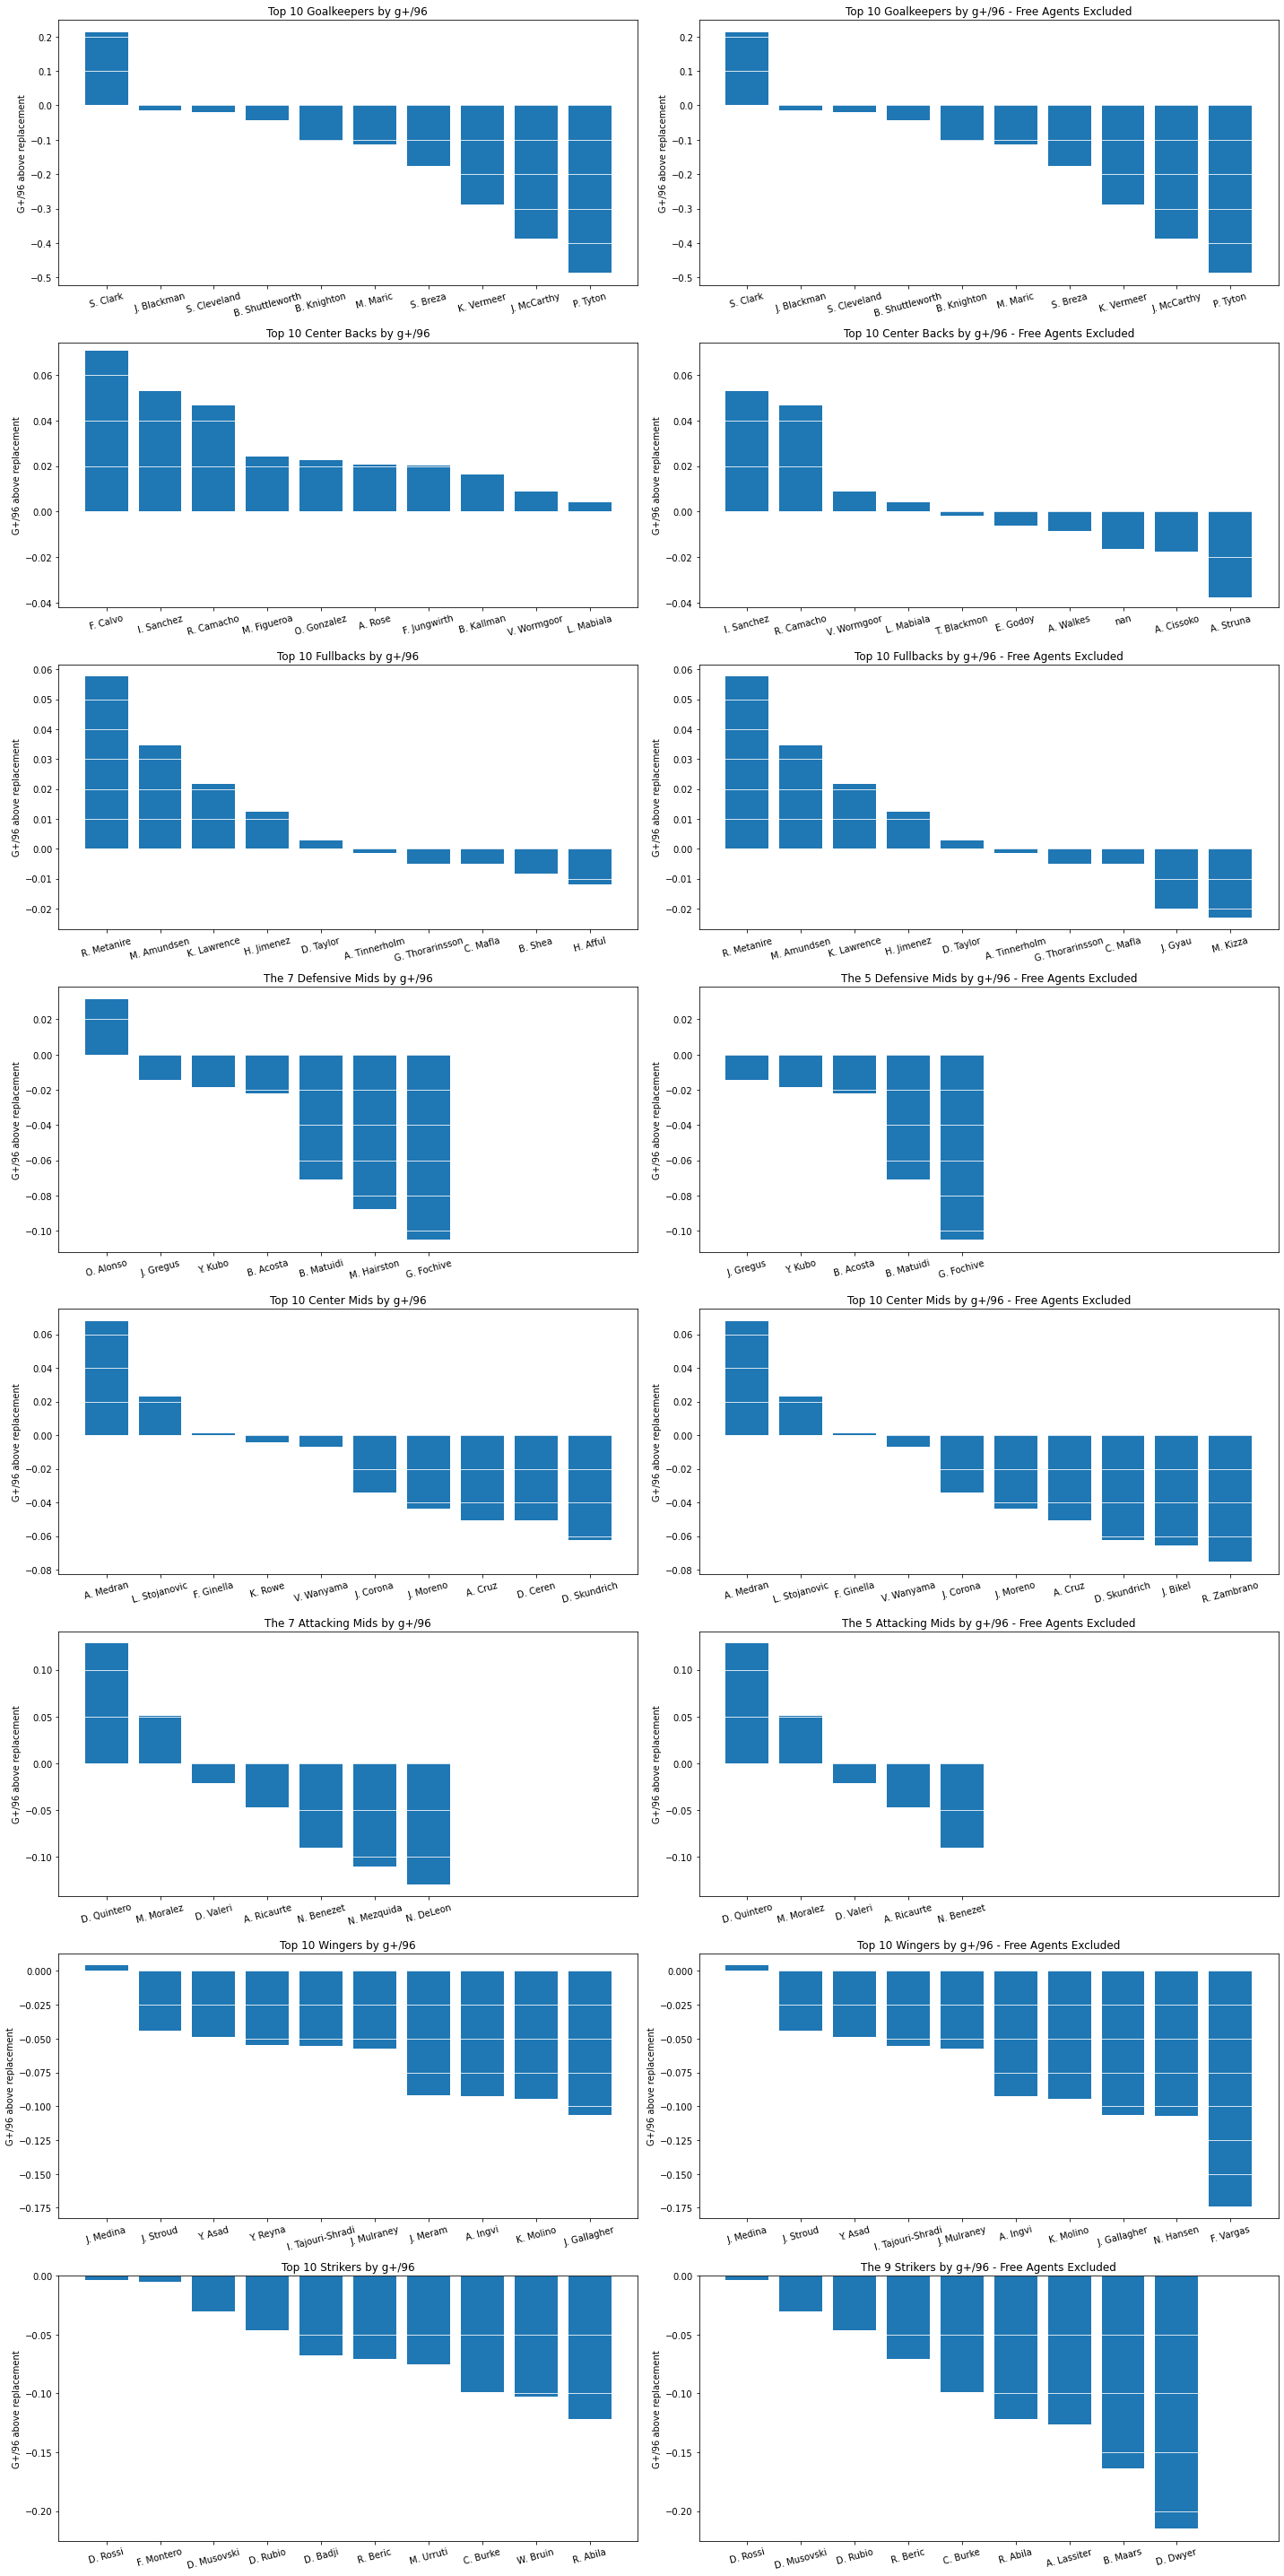

In [354]:
# create the plot for data broken down by position
# 8 unique positions, 2 columns each - w/ Free Agents, and w/o Free Agents
######################################################################################################################################
## first column
fig, ax = plt.subplots(8,2, figsize=(20, 5*8))

PosCleaned = Cleaned[Cleaned['Pos'] == 'GK']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
# for the title, if there are 10 or less players it's not the top 10 players, it's just the 10 players
if (len(PosCleaned) <= 10): s = f"The {n} Goalkeepers by g+/96"
else: s = f"Top {n} Goalkeepers by g+/96"
ax[0,0].set_title(s)
ax[0,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[0,0].grid(axis='y', color='white') # negative space grid again
ax[0,0].set_xticks(xlocs)
ax[0,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[0,0].set_xlim((-0.89, 9.89)) # this correponds to the default xlim with 10 bars
ax[0,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'CB']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Center Backs by g+/96"
else: s = f"Top {n} Center Backs by g+/96"
ax[1,0].set_title(s)
ax[1,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[1,0].grid(axis='y', color='white')
ax[1,0].set_xticks(xlocs)
ax[1,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[1,0].set_xlim((-0.89, 9.89))
ax[1,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'FB']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Fullbacks by g+/96"
else: s = f"Top {n} Fullbacks by g+/96"
ax[2,0].set_title(s)
ax[2,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[2,0].grid(axis='y', color='white')
ax[2,0].set_xticks(xlocs)
ax[2,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[2,0].set_xlim((-0.89, 9.89))
ax[2,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'DM']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Defensive Mids by g+/96"
else: s = f"Top {n} Defensive Mids by g+/96"
ax[3,0].set_title(s)
ax[3,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[3,0].grid(axis='y', color='white')
ax[3,0].set_xticks(xlocs)
ax[3,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[3,0].set_xlim((-0.89, 9.89))
ax[3,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'CM']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Center Mids by g+/96"
else: s = f"Top {n} Center Mids by g+/96"
ax[4,0].set_title(s)
ax[4,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[4,0].grid(axis='y', color='white')
ax[4,0].set_xticks(xlocs)
ax[4,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[4,0].set_xlim((-0.89, 9.89))
ax[4,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'AM']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Attacking Mids by g+/96"
else: s = f"Top {n} Attacking Mids by g+/96"
ax[5,0].set_title(s)
ax[5,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[5,0].grid(axis='y', color='white')
ax[5,0].set_xticks(xlocs)
ax[5,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[5,0].set_xlim((-0.89, 9.89))
ax[5,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'W']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Wingers by g+/96"
else: s = f"Top {n} Wingers by g+/96"
ax[6,0].set_title(s)
ax[6,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[6,0].grid(axis='y', color='white')
ax[6,0].set_xticks(xlocs)
ax[6,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[6,0].set_xlim((-0.89, 9.89))
ax[6,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'ST']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Strikers by g+/96"
else: s = f"Top {n} Strikers by g+/96"
ax[7,0].set_title(s)
ax[7,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[7,0].grid(axis='y', color='white')
ax[7,0].set_xticks(xlocs)
ax[7,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[7,0].set_xlim((-0.89, 9.89))
ax[7,0].set_ylabel('G+/96 above replacement')

######################################################################################################################################
## second column

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'GK']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Goalkeepers by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Goalkeepers by g+/96 - Free Agents Excluded"
ax[0,1].set_title(s)
ax[0,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[0,1].grid(axis='y', color='white')
ax[0,1].set_xticks(xlocs)
ax[0,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[0,1].set_xlim((-0.89, 9.89))
ax[0,1].set_ylabel('G+/96 above replacement')
# This sets the ylim to be the min between left and right col, and max between left and right col
# This way they match and nothing is cut off
ax[0,0].set_ylim(min(ax[0,0].get_ylim()[0], ax[0,1].get_ylim()[0]), max(ax[0,0].get_ylim()[1], ax[0,1].get_ylim()[1]))
ax[0,1].set_ylim(min(ax[0,0].get_ylim()[0], ax[0,1].get_ylim()[0]), max(ax[0,0].get_ylim()[1], ax[0,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'CB']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Center Backs by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Center Backs by g+/96 - Free Agents Excluded"
ax[1,1].set_title(s)
ax[1,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[1,1].grid(axis='y', color='white')
ax[1,1].set_xticks(xlocs)
ax[1,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[1,1].set_xlim((-0.89, 9.89))
ax[1,1].set_ylabel('G+/96 above replacement')
ax[1,0].set_ylim(min(ax[1,0].get_ylim()[0], ax[1,1].get_ylim()[0]), max(ax[1,0].get_ylim()[1], ax[1,1].get_ylim()[1]))
ax[1,1].set_ylim(min(ax[1,0].get_ylim()[0], ax[1,1].get_ylim()[0]), max(ax[1,0].get_ylim()[1], ax[1,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'FB']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Fullbacks by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Fullbacks by g+/96 - Free Agents Excluded"
ax[2,1].set_title(s)
ax[2,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[2,1].grid(axis='y', color='white')
ax[2,1].set_xticks(xlocs)
ax[2,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[2,1].set_xlim((-0.89, 9.89))
ax[2,1].set_ylabel('G+/96 above replacement')
ax[2,0].set_ylim(min(ax[2,0].get_ylim()[0], ax[2,1].get_ylim()[0]), max(ax[2,0].get_ylim()[1], ax[2,1].get_ylim()[1]))
ax[2,1].set_ylim(min(ax[2,0].get_ylim()[0], ax[2,1].get_ylim()[0]), max(ax[2,0].get_ylim()[1], ax[2,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'DM']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Defensive Mids by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Defensive Mids by g+/96 - Free Agents Excluded"
ax[3,1].set_title(s)
ax[3,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[3,1].grid(axis='y', color='white')
ax[3,1].set_xticks(xlocs)
ax[3,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[3,1].set_xlim((-0.89, 9.89))
ax[3,1].set_ylabel('G+/96 above replacement')
ax[3,0].set_ylim(min(ax[3,0].get_ylim()[0], ax[3,1].get_ylim()[0]), max(ax[3,0].get_ylim()[1], ax[3,1].get_ylim()[1]))
ax[3,1].set_ylim(min(ax[3,0].get_ylim()[0], ax[3,1].get_ylim()[0]), max(ax[3,0].get_ylim()[1], ax[3,1].get_ylim()[1]))


PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'CM']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Center Mids by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Center Mids by g+/96 - Free Agents Excluded"
ax[4,1].set_title(s)
ax[4,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[4,1].grid(axis='y', color='white')
ax[4,1].set_xticks(xlocs)
ax[4,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[4,1].set_xlim((-0.89, 9.89))
ax[4,1].set_ylabel('G+/96 above replacement')
ax[4,0].set_ylim(min(ax[4,0].get_ylim()[0], ax[4,1].get_ylim()[0]), max(ax[4,0].get_ylim()[1], ax[4,1].get_ylim()[1]))
ax[4,1].set_ylim(min(ax[4,0].get_ylim()[0], ax[4,1].get_ylim()[0]), max(ax[4,0].get_ylim()[1], ax[4,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'AM']
n = min(10, len(PosCleaned))
if (len(PosCleaned) <= 10): s = f"The {n} Attacking Mids by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Attacking Mids by g+/96 - Free Agents Excluded"
xlocs = list(range(n))
ax[5,1].set_title(s)
ax[5,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[5,1].grid(axis='y', color='white')
ax[5,1].set_xticks(xlocs)
ax[5,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[5,1].set_xlim((-0.89, 9.89))
ax[5,1].set_ylabel('G+/96 above replacement')
ax[5,0].set_ylim(min(ax[5,0].get_ylim()[0], ax[5,1].get_ylim()[0]), max(ax[5,0].get_ylim()[1], ax[5,1].get_ylim()[1]))
ax[5,1].set_ylim(min(ax[5,0].get_ylim()[0], ax[5,1].get_ylim()[0]), max(ax[5,0].get_ylim()[1], ax[5,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'W']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Wingers by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Wingers by g+/96 - Free Agents Excluded"
ax[6,1].set_title(s)
ax[6,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[6,1].grid(axis='y', color='white')
ax[6,1].set_xticks(xlocs)
ax[6,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[6,1].set_xlim((-0.89, 9.89))
ax[6,1].set_ylabel('G+/96 above replacement')
ax[6,0].set_ylim(min(ax[6,0].get_ylim()[0], ax[6,1].get_ylim()[0]), max(ax[6,0].get_ylim()[1], ax[6,1].get_ylim()[1]))
ax[6,1].set_ylim(min(ax[6,0].get_ylim()[0], ax[6,1].get_ylim()[0]), max(ax[6,0].get_ylim()[1], ax[6,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'ST']
n = min(10, len(PosCleaned))
xlocs = list(range(n))
if (len(PosCleaned) <= 10): s = f"The {n} Strikers by g+/96 - Free Agents Excluded"
else: s = f"Top {n} Strikers by g+/96 - Free Agents Excluded"
ax[7,1].set_title(s)
ax[7,1].bar(x=range(n), height=PosCleaned['g+/90'][:n])
ax[7,1].grid(axis='y', color='white')
ax[7,1].set_xticks(xlocs)
ax[7,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[7,1].set_xlim((-0.89, 9.89))
ax[7,1].set_ylabel('G+/96 above replacement')
ax[7,0].set_ylim(min(ax[7,0].get_ylim()[0], ax[7,1].get_ylim()[0]), max(ax[7,0].get_ylim()[1], ax[7,1].get_ylim()[1]))
ax[7,1].set_ylim(min(ax[7,0].get_ylim()[0], ax[7,1].get_ylim()[0]), max(ax[7,0].get_ylim()[1], ax[7,1].get_ylim()[1]))

plt.tight_layout()
plt.savefig('ExpansionDraft2022_byPos.png', dpi=250)

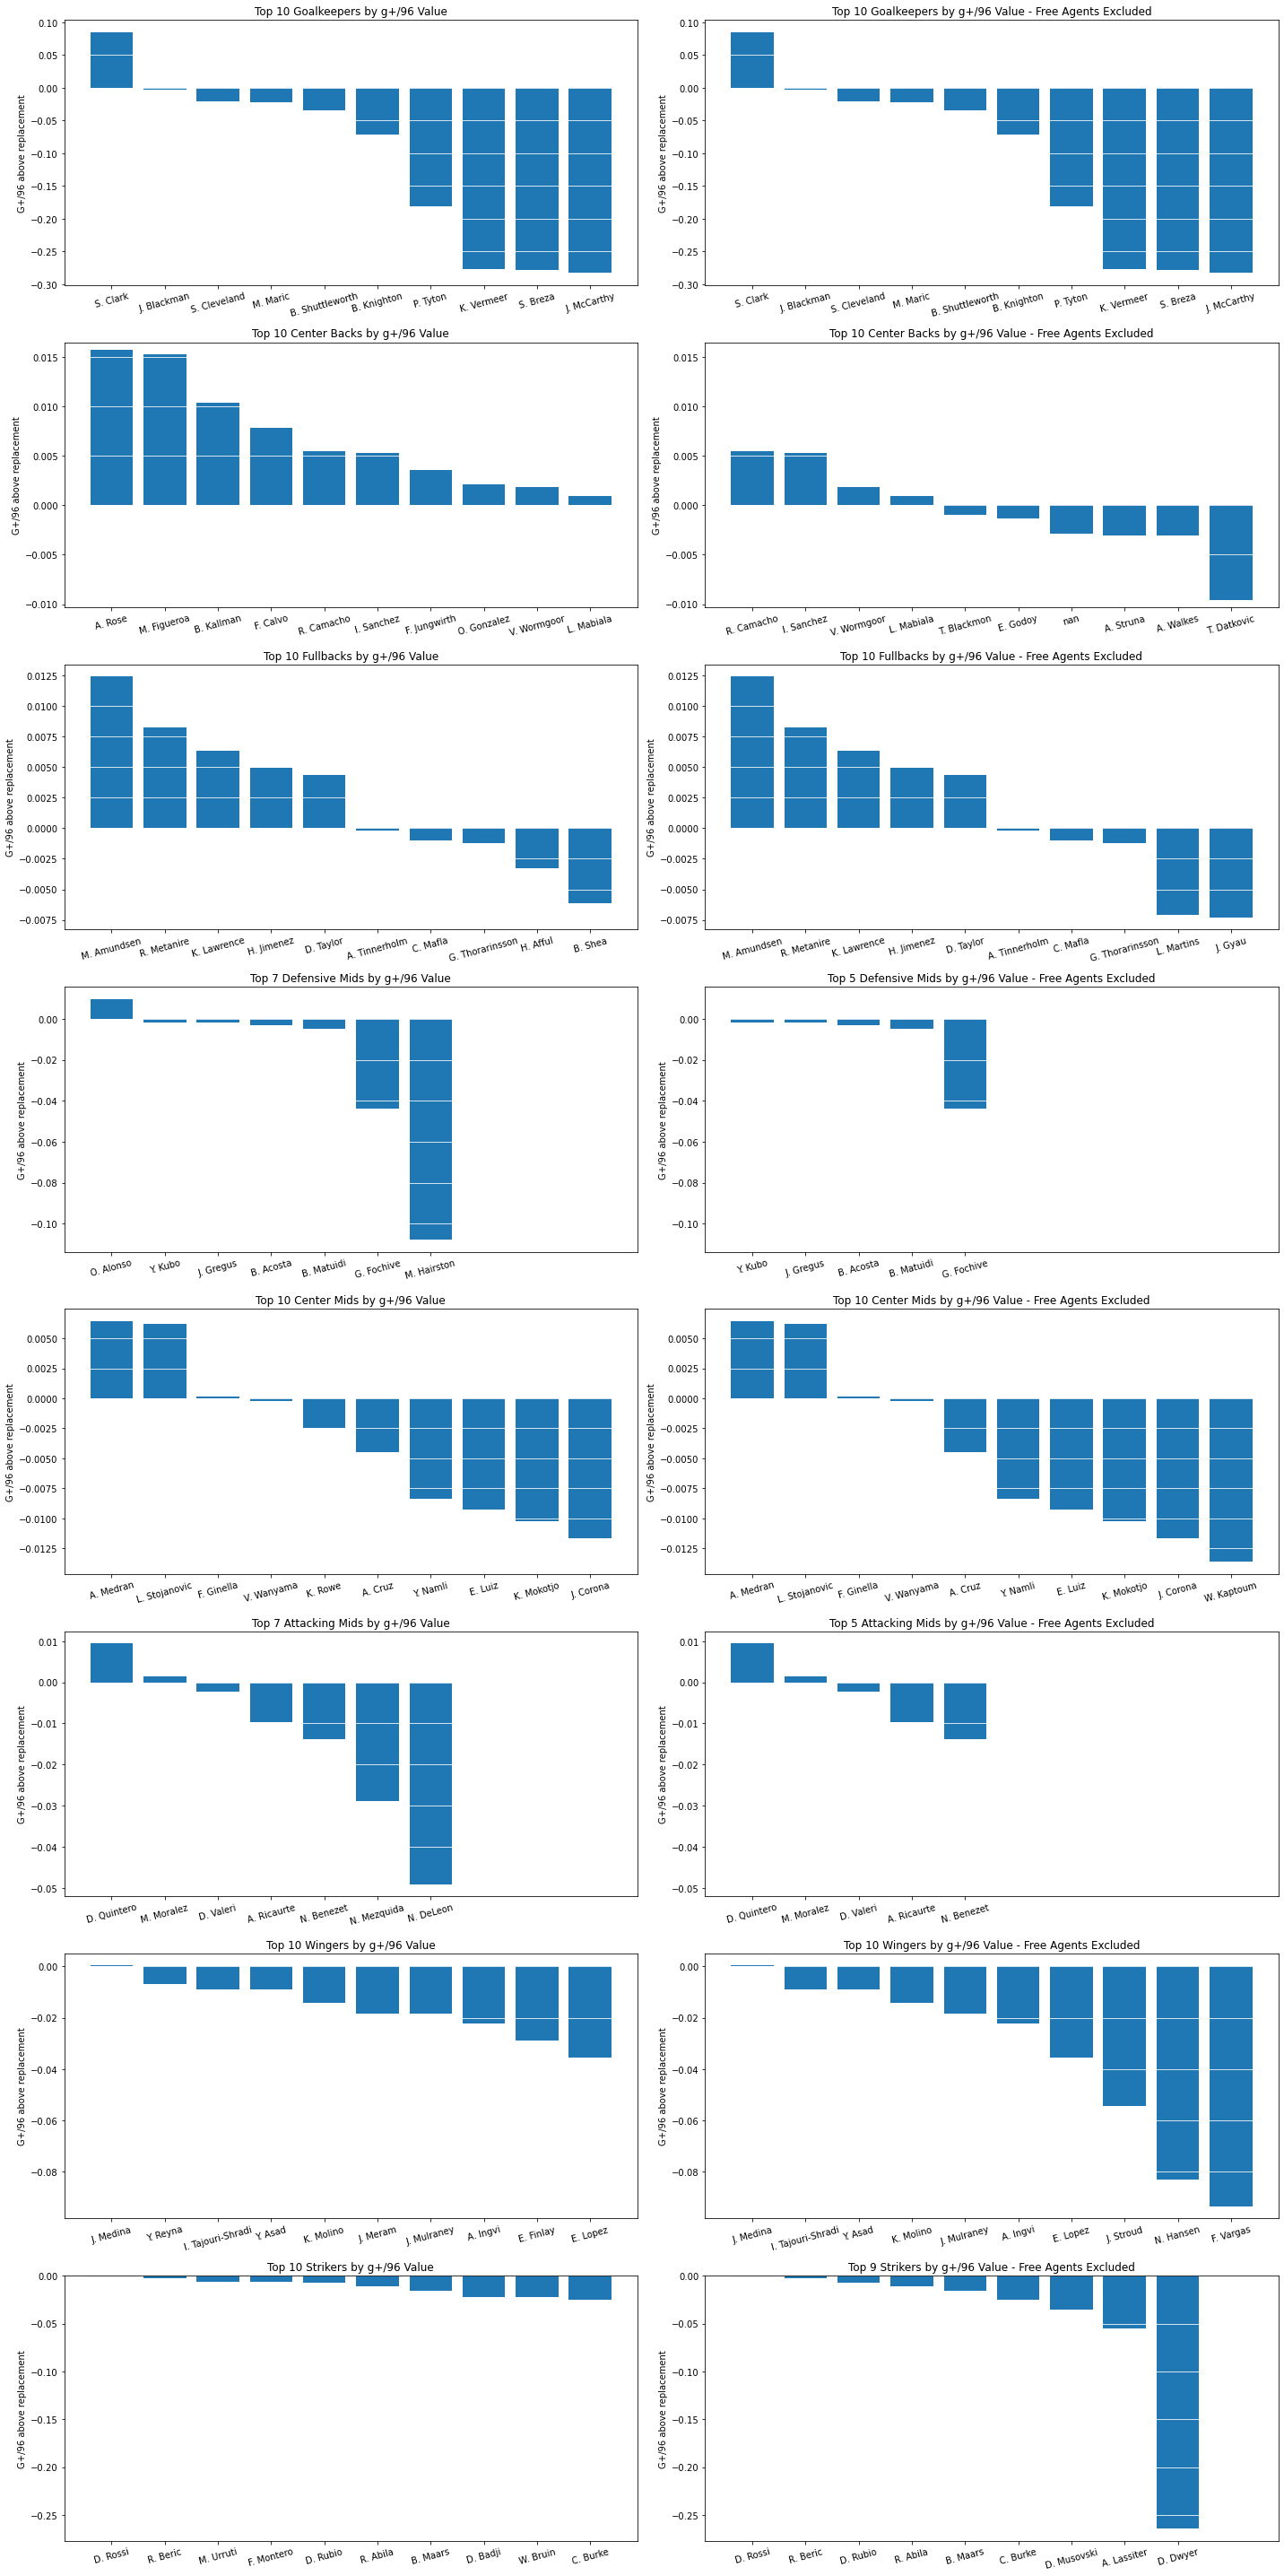

In [356]:
# The same fig as above, but with value instead of g+/96

fig, ax = plt.subplots(8,2, figsize=(20, 5*8))

PosCleaned = Cleaned[Cleaned['Pos'] == 'GK'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[0,0].set_title(f"Top {n} Goalkeepers by g+/96 Value")
ax[0,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[0,0].grid(axis='y', color='white')
ax[0,0].set_xticks(xlocs)
ax[0,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[0,0].set_xlim((-0.89, 9.89))
ax[0,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'CB'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[1,0].set_title(f"Top {n} Center Backs by g+/96 Value")
ax[1,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[1,0].grid(axis='y', color='white')
ax[1,0].set_xticks(xlocs)
ax[1,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[1,0].set_xlim((-0.89, 9.89))
ax[1,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'FB'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[2,0].set_title(f"Top {n} Fullbacks by g+/96 Value")
ax[2,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[2,0].grid(axis='y', color='white')
ax[2,0].set_xticks(xlocs)
ax[2,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[2,0].set_xlim((-0.89, 9.89))
ax[2,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'DM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[3,0].set_title(f"Top {n} Defensive Mids by g+/96 Value")
ax[3,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[3,0].grid(axis='y', color='white')
ax[3,0].set_xticks(xlocs)
ax[3,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[3,0].set_xlim((-0.89, 9.89))
ax[3,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'CM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[4,0].set_title(f"Top {n} Center Mids by g+/96 Value")
ax[4,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[4,0].grid(axis='y', color='white')
ax[4,0].set_xticks(xlocs)
ax[4,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[4,0].set_xlim((-0.89, 9.89))
ax[4,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'AM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[5,0].set_title(f"Top {n} Attacking Mids by g+/96 Value")
ax[5,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[5,0].grid(axis='y', color='white')
ax[5,0].set_xticks(xlocs)
ax[5,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[5,0].set_xlim((-0.89, 9.89))
ax[5,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'W'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[6,0].set_title(f"Top {n} Wingers by g+/96 Value")
ax[6,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[6,0].grid(axis='y', color='white')
ax[6,0].set_xticks(xlocs)
ax[6,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[6,0].set_xlim((-0.89, 9.89))
ax[6,0].set_ylabel('G+/96 above replacement')

PosCleaned = Cleaned[Cleaned['Pos'] == 'ST'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[7,0].set_title(f"Top {n} Strikers by g+/96 Value")
ax[7,0].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[7,0].grid(axis='y', color='white')
ax[7,0].set_xticks(xlocs)
ax[7,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[7,0].set_xlim((-0.89, 9.89))
ax[7,0].set_ylabel('G+/96 above replacement')

######################################################################################################################################

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'GK'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[0,1].set_title(f"Top {n} Goalkeepers by g+/96 Value - Free Agents Excluded")
ax[0,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[0,1].grid(axis='y', color='white')
ax[0,1].set_xticks(xlocs)
ax[0,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[0,1].set_xlim((-0.89, 9.89))
ax[0,1].set_ylabel('G+/96 above replacement')
ax[0,0].set_ylim(min(ax[0,0].get_ylim()[0], ax[0,1].get_ylim()[0]), max(ax[0,0].get_ylim()[1], ax[0,1].get_ylim()[1]))
ax[0,1].set_ylim(min(ax[0,0].get_ylim()[0], ax[0,1].get_ylim()[0]), max(ax[0,0].get_ylim()[1], ax[0,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'CB'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[1,1].set_title(f"Top {n} Center Backs by g+/96 Value - Free Agents Excluded")
ax[1,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[1,1].grid(axis='y', color='white')
ax[1,1].set_xticks(xlocs)
ax[1,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[1,1].set_xlim((-0.89, 9.89))
ax[1,1].set_ylabel('G+/96 above replacement')
ax[1,0].set_ylim(min(ax[1,0].get_ylim()[0], ax[1,1].get_ylim()[0]), max(ax[1,0].get_ylim()[1], ax[1,1].get_ylim()[1]))
ax[1,1].set_ylim(min(ax[1,0].get_ylim()[0], ax[1,1].get_ylim()[0]), max(ax[1,0].get_ylim()[1], ax[1,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'FB'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[2,1].set_title(f"Top {n} Fullbacks by g+/96 Value - Free Agents Excluded")
ax[2,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[2,1].grid(axis='y', color='white')
ax[2,1].set_xticks(xlocs)
ax[2,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[2,1].set_xlim((-0.89, 9.89))
ax[2,1].set_ylabel('G+/96 above replacement')
ax[2,0].set_ylim(min(ax[2,0].get_ylim()[0], ax[2,1].get_ylim()[0]), max(ax[2,0].get_ylim()[1], ax[2,1].get_ylim()[1]))
ax[2,1].set_ylim(min(ax[2,0].get_ylim()[0], ax[2,1].get_ylim()[0]), max(ax[2,0].get_ylim()[1], ax[2,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'DM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[3,1].set_title(f"Top {n} Defensive Mids by g+/96 Value - Free Agents Excluded")
ax[3,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[3,1].grid(axis='y', color='white')
ax[3,1].set_xticks(xlocs)
ax[3,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[3,1].set_xlim((-0.89, 9.89))
ax[3,1].set_ylabel('G+/96 above replacement')
ax[3,0].set_ylim(min(ax[3,0].get_ylim()[0], ax[3,1].get_ylim()[0]), max(ax[3,0].get_ylim()[1], ax[3,1].get_ylim()[1]))
ax[3,1].set_ylim(min(ax[3,0].get_ylim()[0], ax[3,1].get_ylim()[0]), max(ax[3,0].get_ylim()[1], ax[3,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'CM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[4,1].set_title(f"Top {n} Center Mids by g+/96 Value - Free Agents Excluded")
ax[4,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[4,1].grid(axis='y', color='white')
ax[4,1].set_xticks(xlocs)
ax[4,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[4,1].set_xlim((-0.89, 9.89))
ax[4,1].set_ylabel('G+/96 above replacement')
ax[4,0].set_ylim(min(ax[4,0].get_ylim()[0], ax[4,1].get_ylim()[0]), max(ax[4,0].get_ylim()[1], ax[4,1].get_ylim()[1]))
ax[4,1].set_ylim(min(ax[4,0].get_ylim()[0], ax[4,1].get_ylim()[0]), max(ax[4,0].get_ylim()[1], ax[4,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'AM'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[5,1].set_title(f"Top {n} Attacking Mids by g+/96 Value - Free Agents Excluded")
ax[5,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[5,1].grid(axis='y', color='white')
ax[5,1].set_xticks(xlocs)
ax[5,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[5,1].set_xlim((-0.89, 9.89))
ax[5,1].set_ylabel('G+/96 above replacement')
ax[5,0].set_ylim(min(ax[5,0].get_ylim()[0], ax[5,1].get_ylim()[0]), max(ax[5,0].get_ylim()[1], ax[5,1].get_ylim()[1]))
ax[5,1].set_ylim(min(ax[5,0].get_ylim()[0], ax[5,1].get_ylim()[0]), max(ax[5,0].get_ylim()[1], ax[5,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'W'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[6,1].set_title(f"Top {n} Wingers by g+/96 Value - Free Agents Excluded")
ax[6,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[6,1].grid(axis='y', color='white')
ax[6,1].set_xticks(xlocs)
ax[6,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[6,1].set_xlim((-0.89, 9.89))
ax[6,1].set_ylabel('G+/96 above replacement')
ax[6,0].set_ylim(min(ax[6,0].get_ylim()[0], ax[6,1].get_ylim()[0]), max(ax[6,0].get_ylim()[1], ax[6,1].get_ylim()[1]))
ax[6,1].set_ylim(min(ax[6,0].get_ylim()[0], ax[6,1].get_ylim()[0]), max(ax[6,0].get_ylim()[1], ax[6,1].get_ylim()[1]))

PosCleaned = nonFA_Cleaned[nonFA_Cleaned['Pos'] == 'ST'].sort_values(by='Value', ascending=False)
n = min(10, len(PosCleaned))
xlocs = list(range(n))
ax[7,1].set_title(f"Top {n} Strikers by g+/96 Value - Free Agents Excluded")
ax[7,1].bar(x=range(n), height=PosCleaned['Value'][:n])
ax[7,1].grid(axis='y', color='white')
ax[7,1].set_xticks(xlocs)
ax[7,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
ax[7,1].set_xlim((-0.89, 9.89))
ax[7,1].set_ylabel('G+/96 above replacement')
ax[7,0].set_ylim(min(ax[7,0].get_ylim()[0], ax[7,1].get_ylim()[0]), max(ax[7,0].get_ylim()[1], ax[7,1].get_ylim()[1]))
ax[7,1].set_ylim(min(ax[7,0].get_ylim()[0], ax[7,1].get_ylim()[0]), max(ax[7,0].get_ylim()[1], ax[7,1].get_ylim()[1]))

plt.tight_layout()
plt.savefig('ExpansionDraft2022_byPos_Value.png', dpi=250)

#### Drafting the tweet that will go with the vizzes

In [ ]:
#Here's the top unprotected players by ASA's g+/96 above replacement
#Also included is player value - g+/96 per 100k in guaranteed salary (2021)
#(min. 500 mins played, goalkeepers excluded)
#Free agents included on the left, excluded on th right

In [ ]:
#Broken down by position, top players available by both g+/96 and value (g+/96 per 100k)
#Again, free agents included on the left, excluded on the right

## Let's run it back with free agents instead of unprotected players

In [111]:
FAs = pd.read_csv('FA_List_2022.csv', encoding='cp1252') # encoding bc of pandas bug, not sure why it's happening but this is the fix: https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte
#FAs['Player'] = FAs['Name'].apply(unidecode) # changing 'Name' to 'Player' to make old code easier to port over here
FAs

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA
0,Mikey,Ambrose,Atlanta United,D,Option,Mikey Ambrose,Mikey Ambrose,NaN
1,Alec,Kann,Atlanta United,GK,Option,Alec Kann,Alec Kann,x
2,Brooks,Lennon,Atlanta United,D,Option,Brooks Lennon,Brooks Lennon,NaN
3,Erick,Torres,Atlanta United,F,Option,Erick Torres,Erick Torres,x
4,Kekuta,Manneh,Austin FC,F,Option,Kekuta Manneh,Kekuta Manneh,x
...,...,...,...,...,...,...,...,...
124,Andy,Rose,Vancouver Whitecaps,M,Out of Contract,Andy Rose,Andy Rose,x
125,Cody,Cropper,NaN,GK,Option,Cody Cropper,Cody Cropper,x
126,Adam,Jahn,NaN,F,Option,Adam Jahn,NaN,x
127,Matt,Lampson,NaN,GK,Option,Matt Lampson,Matt Lampson,x


In [112]:
# Load unprotected players csv, data hand-copied from article on MLSSoccer.com

FAs = FAs[~pd.isna(FAs['Name_ASA'])]
FAs[['Pos', 'Min', 'g+/90', 'Salary']] = np.nan # get the g+ data into this table so we're not dealing with multiple dataframes
for i in FAs.index:
    name_asa = FAs['Name_ASA'][i]
    if (name_asa in list(GoalsAdded['Player'])):
        FAs['Pos'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['Position'].iloc[0]
        FAs['Min'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['Minutes'].iloc[0]
        FAs['g+/90'][i] = GoalsAdded[GoalsAdded['Player'] == name_asa]['GAp96'].iloc[0]
        FAs['Salary'][i] = Salaries2021[Salaries2021['Player'] == name_asa]['GuarComp_int']
    elif (name_asa in list(GoalsAdded_GK['Player'])):
        FAs['Pos'][i] = 'GK'
        FAs['Min'][i] = GoalsAdded_GK[GoalsAdded_GK['Player'] == name_asa]['Minutes'].iloc[0]
        FAs['g+/90'][i] = GoalsAdded_GK[GoalsAdded_GK['Player'] == name_asa]['GAp96'].iloc[0]
        FAs['Salary'][i] = Salaries2021[Salaries2021['Player'] == name_asa]['GuarComp_int']
FAs['Value'] = (FAs['g+/90'] / FAs['Salary']) * 100000 # create value metric: g+/96 per 100k salary
FAs = FAs.sort_values(by='g+/90', ascending=False).reset_index(drop=True)
FAs

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA,Pos,Min,g+/90,Salary,Value
0,Joe,Bendik,Philadelphia Union,GK,Option,Joe Bendik,Joe Bendik,NaN,GK,238.0,0.641345,200000.0,0.320672
1,Alec,Kann,Atlanta United,GK,Option,Alec Kann,Alec Kann,x,GK,495.0,0.581818,115000.0,0.505929
2,Spencer,Richey,Seattle Sounders FC,GK,Option,Spencer Richey,Spencer Richey,x,GK,196.0,0.362449,81375.0,0.445406
3,Steve,Clark,Portland Timbers,GK,Out of Contract,Steve Clark,Steve Clark,x,GK,2319.0,0.287296,250000.0,0.114918
4,Sebastian,Blanco,Portland Timbers,M-F,Out of Contract,Sebastian Blanco,Sebastian Blanco,x,AM,1312.0,0.285366,2313330.0,0.012336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Ryan,Meara,New York Red Bulls,GK,Option,Ryan Meara,Ryan Meara,NaN,NaN,NaN,NaN,NaN,NaN
119,David,Bingham,Portland Timbers,GK,Out of Contract,David Bingham,David Bingham,NaN,NaN,NaN,NaN,NaN,NaN
120,Matt,Bersano,San Jose Earthquakes,GK,Out of Contract,Matt Bersano,Matt Bersano,x,NaN,NaN,NaN,NaN,NaN
121,Kendall,McIntosh,Sporting Kansas City,GK,Out of Contract,Kendall McIntosh,Kendall McIntosh,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
FAs['Name_Short'] = np.nan # create a shortened name (Firstname Lastname --> F. Lastname) for viz labels
for i in FAs.index:
    name = FAs['Name_ASA'][i]
    name = name.split(' ')
    if (len(name) > 1):
        FAs['Name_Short'][i] = name[0][0] + '. ' + ' '.join(name[1:]) # works for names like D. Royer and J. dos Santos
    elif (len(name) == 1):
        FAs['Name_Short'][i] = FAs['Name_ASA'][i]
FAs

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA,Pos,Min,g+/90,Salary,Value,Name_Short
0,Joe,Bendik,Philadelphia Union,GK,Option,Joe Bendik,Joe Bendik,NaN,GK,238.0,0.641345,200000.0,0.320672,J. Bendik
1,Alec,Kann,Atlanta United,GK,Option,Alec Kann,Alec Kann,x,GK,495.0,0.581818,115000.0,0.505929,A. Kann
2,Spencer,Richey,Seattle Sounders FC,GK,Option,Spencer Richey,Spencer Richey,x,GK,196.0,0.362449,81375.0,0.445406,S. Richey
3,Steve,Clark,Portland Timbers,GK,Out of Contract,Steve Clark,Steve Clark,x,GK,2319.0,0.287296,250000.0,0.114918,S. Clark
4,Sebastian,Blanco,Portland Timbers,M-F,Out of Contract,Sebastian Blanco,Sebastian Blanco,x,AM,1312.0,0.285366,2313330.0,0.012336,S. Blanco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Ryan,Meara,New York Red Bulls,GK,Option,Ryan Meara,Ryan Meara,NaN,NaN,NaN,NaN,NaN,NaN,R. Meara
119,David,Bingham,Portland Timbers,GK,Out of Contract,David Bingham,David Bingham,NaN,NaN,NaN,NaN,NaN,NaN,D. Bingham
120,Matt,Bersano,San Jose Earthquakes,GK,Out of Contract,Matt Bersano,Matt Bersano,x,NaN,NaN,NaN,NaN,NaN,M. Bersano
121,Kendall,McIntosh,Sporting Kansas City,GK,Out of Contract,Kendall McIntosh,Kendall McIntosh,NaN,NaN,NaN,NaN,NaN,NaN,K. McIntosh


In [226]:
# create a df with players that make the minute cutoff
#Cleaned = FAs[(FAs['Min'] >= 500) & (FAs['Still_FA'] == 'x')].sort_values(by='g+/90', ascending=False) 
#Cleaned_noGK = FAs[(FAs['Pos'] != 'GK') & (FAs['Min'] >= 500) & (FAs['Still_FA'] == 'x')].sort_values(by='g+/90', ascending=False)
Cleaned = FAs[(FAs['Min'] >= 250) & (FAs['Still_FA'] == 'x')].sort_values(by='g+/90', ascending=False) 
Cleaned_noGK = FAs[(FAs['Pos'] != 'GK') & (FAs['Min'] >= 250) & (FAs['Still_FA'] == 'x')].sort_values(by='g+/90', ascending=False)
Cleaned_noGK

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA,Pos,Min,g+/90,Salary,Value,Name_Short
4,Sebastian,Blanco,Portland Timbers,M-F,Out of Contract,Sebastian Blanco,Sebastian Blanco,x,AM,1312.0,0.285366,2313330.0,0.012336,S. Blanco
5,Maxi,Moralez,New York City FC,M,Out of Contract,Maxi Moralez,Maximiliano Moralez,x,AM,2616.0,0.278165,3285000.0,0.008468,M. Moralez
8,Fredy,Montero,Seattle Sounders FC,F,Option,Fredy Montero,Fredy Montero,x,ST,1644.0,0.229489,81375.0,0.282014,F. Montero
9,Francisco,Calvo,Chicago Fire,D,Option,Francisco Calvo,Francisco Calvo,x,CB,1613.0,0.213664,902600.0,0.023672,F. Calvo
14,Albert,Rusnak,Real Salt Lake,M,Out of Contract,Albert Rusnak,Albert Rusnak,x,W,3315.0,0.205321,2351670.0,0.008731,A. Rusnak
15,llie,Sanchez,Sporting Kansas City,M,Option,llie Sanchez,Ilie Sanchez,x,CB,2761.0,0.200623,1000000.0,0.020062,I. Sanchez
16,Sean,Davis,New York Red Bulls,M,Out of Contract,Sean Davis,Sean Davis,x,DM,3398.0,0.196068,402500.0,0.048713,S. Davis
17,Osvaldo,Alonso,Minnesota United,",",Out of Contract,Osvaldo Alonso,Osvaldo Alonso,x,DM,1577.0,0.196018,322000.0,0.060875,O. Alonso
22,Maximiliano,Urruti,Houston Dynamo,F,Option,Maximiliano Urruti,Maximiliano Urruti,x,ST,2446.0,0.172298,1270150.0,0.013565,M. Urruti
23,Dominique,Badji,Colorado Rapids,F,Out of Contract,Dominique Badji,Dominique Badji,x,ST,593.0,0.171602,306250.0,0.056033,D. Badji


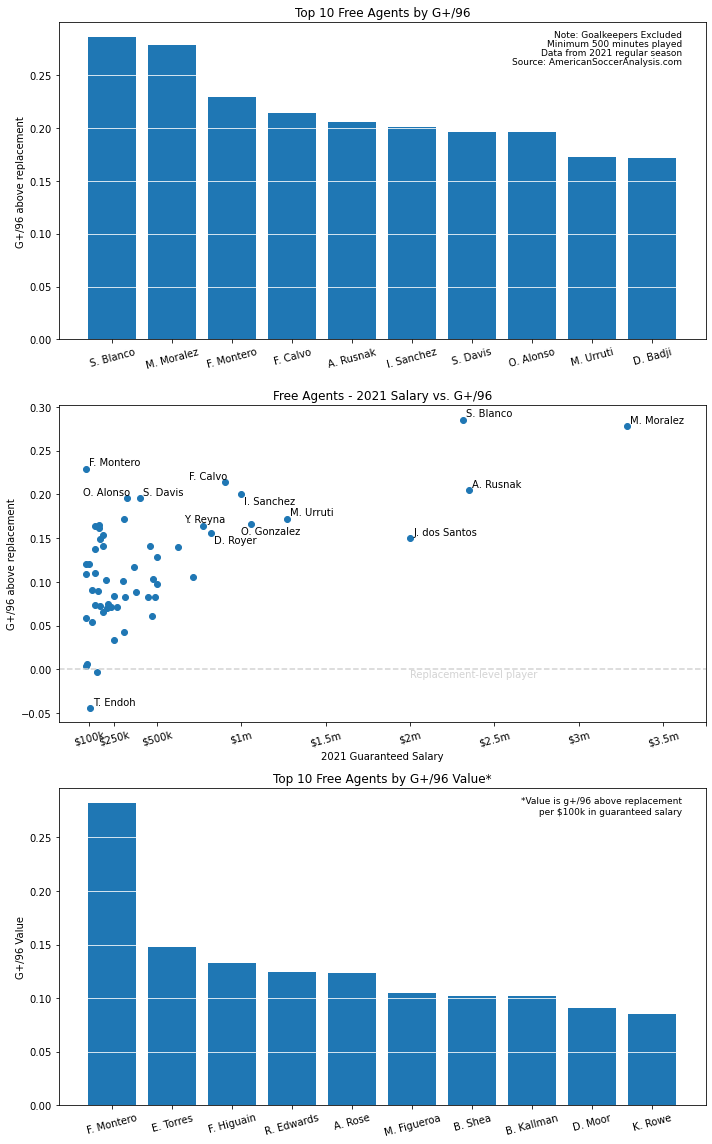

In [227]:
fig, ax = plt.subplots(3,1, figsize=(10,16))
xlocs = list(range(10))

ax[0].bar(x=xlocs, height=Cleaned_noGK['g+/90'][:10])
ax[0].set_xticks(xlocs)
ax[0].set_xticklabels(list(Cleaned_noGK['Name_Short'][:10]), rotation=15)
ax[0].set_ylabel('G+/96 above replacement')
ax[0].grid(axis='y', color='white') # invisible grid that goes through bars
ax[0].set_title('Top 10 Free Agents by G+/96')
# add notes to top right corner of plot
ax[0].text(x=9.5, y=Cleaned_noGK['g+/90'].max(), s='Note: Goalkeepers Excluded',
             horizontalalignment='right', fontsize=9)
ax[0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.0085, s='Minimum 250 minutes played',
             horizontalalignment='right', fontsize=9)
ax[0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.0085*2, s='Data from 2021 regular season',
             horizontalalignment='right', fontsize=9)
ax[0].text(x=9.5, y=Cleaned_noGK['g+/90'].max()-0.0085*3, s='Source: AmericanSoccerAnalysis.com',
           horizontalalignment='right', fontsize=9)


ax[1].scatter(x=Cleaned_noGK['Salary'], y=Cleaned_noGK['g+/90'])
ax[1].axhline(y=0, color='lightgray', linestyle='--')
ax[1].text(x=2000000, y=0, s='Replacement-level player', verticalalignment='top', color='lightgray')
ax[1].set_yscale('linear')
ax[1].set_xticks([100000,250000,500000,1000000,1500000,2000000,2500000,3000000,3500000, 3750000]) # extra tick to add space on right of plot
ax[1].set_xticklabels(['$100k','$250k','$500k','$1m','$1.5m','$2m','$2.5m','$3m','$3.5m', ''], rotation=15)
ax[1].set_ylabel('G+/96 above replacement')
ax[1].set_xlabel('2021 Guaranteed Salary')
ax[1].set_title('Free Agents - 2021 Salary vs. G+/96')
salary_sorted = Cleaned_noGK.sort_values(by='Salary', ascending=False) # to find outlier players easier
value_sorted = Cleaned_noGK.sort_values(by='Value', ascending=False) # to find outlier players easier
# annotate a selection of players in the scatter plot
ax[1].annotate(salary_sorted['Name_Short'][5], xy=(salary_sorted['Salary'][5],salary_sorted['g+/90'][5]), xytext=(3,3),  textcoords='offset points') # M. Moralez
ax[1].annotate(salary_sorted['Name_Short'][14], xy=(salary_sorted['Salary'][14],salary_sorted['g+/90'][14]), xytext=(3,3),  textcoords='offset points') # A. Rusnak
ax[1].annotate(salary_sorted['Name_Short'][4], xy=(salary_sorted['Salary'][4],salary_sorted['g+/90'][4]), xytext=(3,3),  textcoords='offset points') # S. Blanco
ax[1].annotate(salary_sorted['Name_Short'][33], xy=(salary_sorted['Salary'][33],salary_sorted['g+/90'][33]), xytext=(3,3),  textcoords='offset points') # J. dos Santos
ax[1].annotate(salary_sorted['Name_Short'][22], xy=(salary_sorted['Salary'][22],salary_sorted['g+/90'][22]), xytext=(3,3),  textcoords='offset points') # M. Urriti
ax[1].annotate(salary_sorted['Name_Short'][24], xy=(salary_sorted['Salary'][24],salary_sorted['g+/90'][24]), xytext=(-10,-10),  textcoords='offset points') # O. Gonzalez
ax[1].annotate(salary_sorted['Name_Short'][15], xy=(salary_sorted['Salary'][15],salary_sorted['g+/90'][15]), xytext=(3,-10),  textcoords='offset points') # I. Sanchez
ax[1].annotate(salary_sorted['Name_Short'][30], xy=(salary_sorted['Salary'][30],salary_sorted['g+/90'][30]), xytext=(3,-10),  textcoords='offset points') # D. Royer
ax[1].annotate(salary_sorted['Name_Short'][27], xy=(salary_sorted['Salary'][27],salary_sorted['g+/90'][27]), xytext=(2,3),  textcoords='offset points', horizontalalignment='center') # Y. Reyna
ax[1].annotate(Cleaned_noGK['Name_Short'][8],  xy=(Cleaned_noGK['Salary'][8],Cleaned_noGK['g+/90'][8]),   xytext=(3,3),   textcoords='offset points') # F. Montero
ax[1].annotate(Cleaned_noGK['Name_Short'][9],  xy=(Cleaned_noGK['Salary'][9],Cleaned_noGK['g+/90'][9]),   xytext=(3,3),  textcoords='offset points', horizontalalignment='right') # F. Calvo
ax[1].annotate(Cleaned_noGK['Name_Short'][16],  xy=(Cleaned_noGK['Salary'][16],Cleaned_noGK['g+/90'][16]),   xytext=(3,3),  textcoords='offset points') # S. Davis
ax[1].annotate(Cleaned_noGK['Name_Short'][17],  xy=(Cleaned_noGK['Salary'][17],Cleaned_noGK['g+/90'][17]),   xytext=(3,3),  textcoords='offset points', horizontalalignment='right') # O. Alonso
ax[1].annotate(Cleaned_noGK['Name_Short'][104],  xy=(Cleaned_noGK['Salary'][104],Cleaned_noGK['g+/90'][104]),   xytext=(3,3),  textcoords='offset points') # T. Endoh





ax[2].bar(x=xlocs, height=value_sorted['Value'][:10])
ax[2].set_xticks(xlocs)
ax[2].set_xticklabels(list(value_sorted['Name_Short'][:10]), rotation=15)
ax[2].set_ylabel('G+/96 Value')
ax[2].grid(axis='y', color='white')
ax[2].set_title('Top 10 Free Agents by G+/96 Value*')
ax[2].text(x=9.5, y=value_sorted['Value'].iloc[0], s='*Value is g+/96 above replacement',
           horizontalalignment='right', fontsize=9)
ax[2].text(x=9.5, y=value_sorted['Value'].iloc[0]-0.01, s=' per $100k in guaranteed salary',
           horizontalalignment='right', fontsize=9)


plt.tight_layout()

plt.savefig('FreeAgents_2022_plot.png', dpi=250)

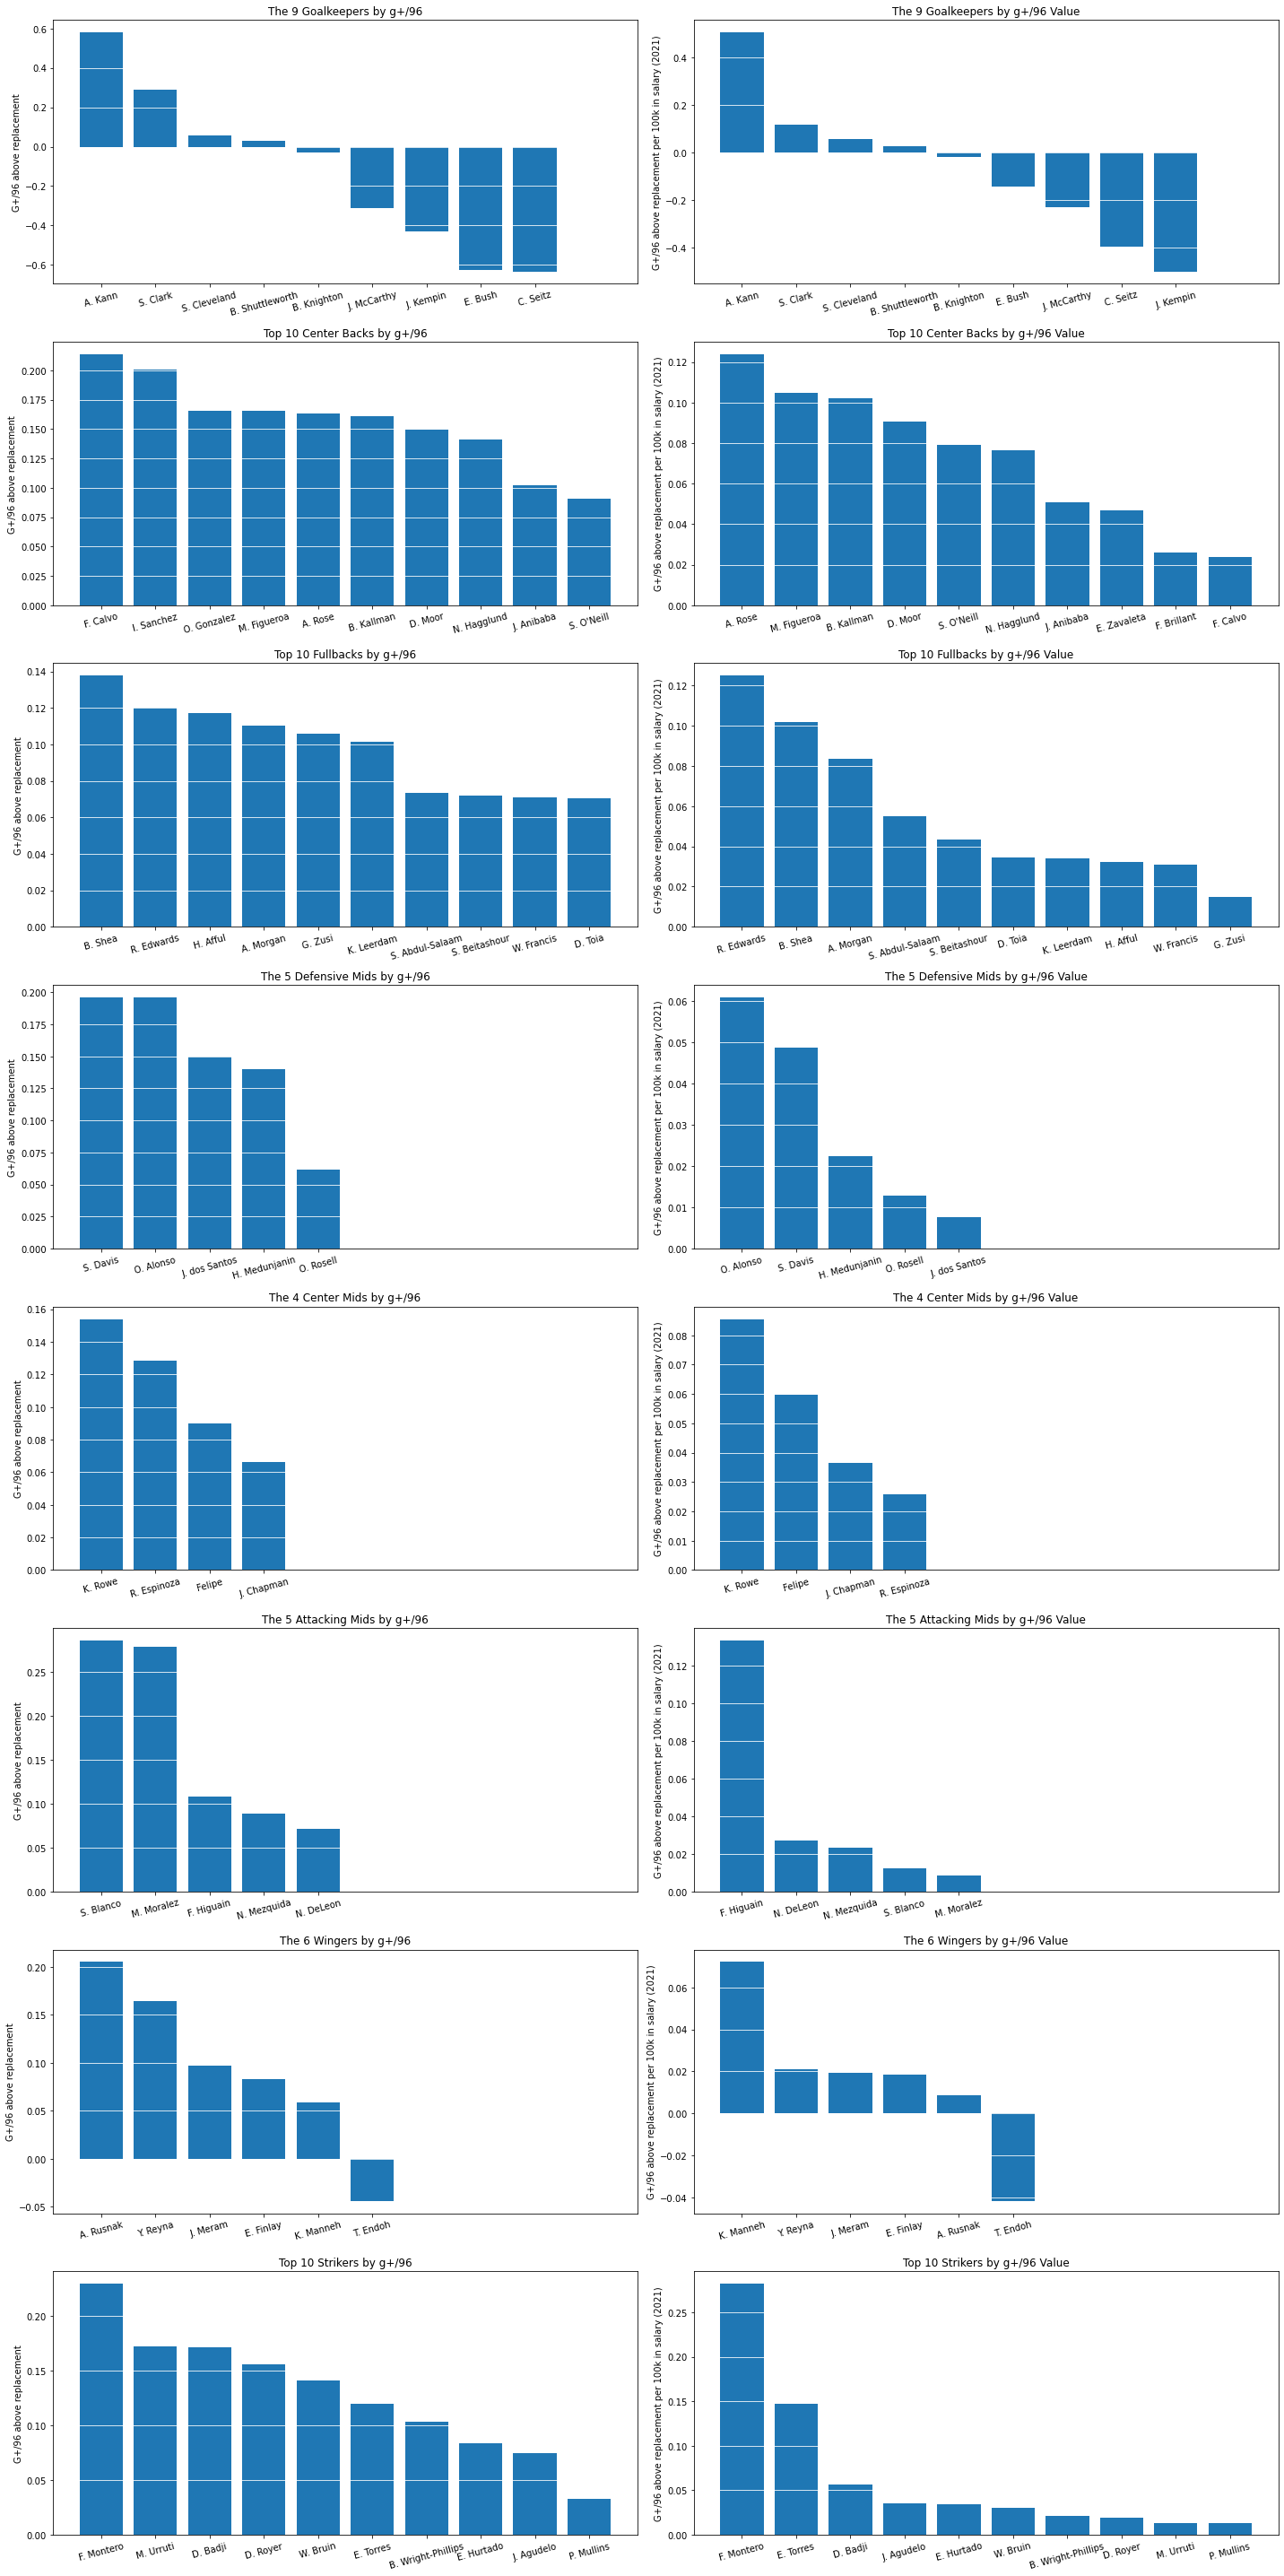

In [235]:
# create the plot for data broken down by position
# 8 unique positions, 2 columns each - w/ Free Agents, and w/o Free Agents
######################################################################################################################################
## first column
fig, ax = plt.subplots(8,2, figsize=(20, 5*8))

pos_abbrevs = ['GK', 'CB', 'FB', 'DM', 'CM', 'AM', 'W', 'ST']
positions = ['Goalkeepers', 'Center Backs', 'Fullbacks', 'Defensive Mids', 'Center Mids', 'Attacking Mids', 'Wingers', 'Strikers']

for i in range(8):
    PosCleaned = Cleaned[Cleaned['Pos'] == pos_abbrevs[i]]
    n = min(10, len(PosCleaned))
    xlocs = list(range(n))
    # for the title, if there are 10 or less players it's not the top 10 players, it's just the 10 players
    if (len(PosCleaned) <= 10): s = f"The {n} {positions[i]} by g+/96"
    else: s = f"Top {n} {positions[i]} by g+/96"
    ax[i,0].set_title(s)
    ax[i,0].bar(x=range(n), height=PosCleaned['g+/90'][:n])
    ax[i,0].grid(axis='y', color='white') # negative space grid again
    ax[i,0].set_xticks(xlocs)
    ax[i,0].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
    ax[i,0].set_xlim((-0.89, 9.89)) # this correponds to the default xlim with 10 bars
    ax[i,0].set_ylabel('G+/96 above replacement')
    
    ######################################################################################################################################
    ## second column

    PosCleaned = Cleaned[Cleaned['Pos'] == pos_abbrevs[i]].sort_values(by='Value', ascending=False)
    n = min(10, len(PosCleaned))
    xlocs = list(range(n))
    if (len(PosCleaned) <= 10): s = f"The {n} {positions[i]} by g+/96 Value"
    else: s = f"Top {n} {positions[i]} by g+/96 Value"
    ax[i,1].set_title(s)
    ax[i,1].bar(x=range(n), height=PosCleaned['Value'][:n])
    ax[i,1].grid(axis='y', color='white')
    ax[i,1].set_xticks(xlocs)
    ax[i,1].set_xticklabels(list(PosCleaned['Name_Short'][:n]), rotation=15)
    ax[i,1].set_xlim((-0.89, 9.89))
    ax[i,1].set_ylabel('G+/96 above replacement per 100k in salary (2021)')
    # This sets the ylim to be the min between left and right col, and max between left and right col
    # This way they match and nothing is cut off
    #ax[i,0].set_ylim(min(ax[i,0].get_ylim()[0], ax[i,1].get_ylim()[0]), max(ax[i,0].get_ylim()[1], ax[i,1].get_ylim()[1]))
    #ax[i,1].set_ylim(min(ax[i,0].get_ylim()[0], ax[i,1].get_ylim()[0]), max(ax[i,0].get_ylim()[1], ax[i,1].get_ylim()[1]))



plt.tight_layout()
plt.savefig('FreeAgents2022_byPos.png', dpi=250)

In [117]:
Cleaned[Cleaned['Pos'] == 'CM']

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA,Pos,Min,g+/90,Salary,Value,Name_Short
31,Kelyn,Rowe,Seattle Sounders FC,M-D,Option,Kelyn Rowe,Kelyn Rowe,x,CM,2400.0,0.154000,180000.0,0.085556,K. Rowe
41,Roger,Espinoza,Sporting Kansas City,M,Out of Contract,Roger Espinoza,Roger Espinoza,x,CM,2272.0,0.128451,500000.0,0.025690,R. Espinoza
66,Felipe,Martins,DC United,M,Option,Felipe Martins,Felipe,x,CM,1283.0,0.089790,150000.0,0.059860,Felipe
84,Jay,Chapman,Inter Miami,M,Option,Jay Chapman,Jay Chapman,x,CM,1308.0,0.066055,180333.0,0.036629,J. Chapman


In [119]:
Cleaned

,First Name,Last Name,Team,Position,Unnamed: 4,Name,Name_ASA,Still_FA,Pos,Min,g+/90,Salary,Value,Name_Short
3,Steve,Clark,Portland Timbers,GK,Out of Contract,Steve Clark,Steve Clark,x,GK,2319.0,0.287296,250000.0,0.114918,S. Clark
4,Sebastian,Blanco,Portland Timbers,M-F,Out of Contract,Sebastian Blanco,Sebastian Blanco,x,AM,1312.0,0.285366,2313330.0,0.012336,S. Blanco
5,Maxi,Moralez,New York City FC,M,Out of Contract,Maxi Moralez,Maximiliano Moralez,x,AM,2616.0,0.278165,3285000.0,0.008468,M. Moralez
8,Fredy,Montero,Seattle Sounders FC,F,Option,Fredy Montero,Fredy Montero,x,ST,1644.0,0.229489,81375.0,0.282014,F. Montero
9,Francisco,Calvo,Chicago Fire,D,Option,Francisco Calvo,Francisco Calvo,x,CB,1613.0,0.213664,902600.0,0.023672,F. Calvo
14,Albert,Rusnak,Real Salt Lake,M,Out of Contract,Albert Rusnak,Albert Rusnak,x,W,3315.0,0.205321,2351670.0,0.008731,A. Rusnak
15,llie,Sanchez,Sporting Kansas City,M,Option,llie Sanchez,Ilie Sanchez,x,CB,2761.0,0.200623,1000000.0,0.020062,I. Sanchez
16,Sean,Davis,New York Red Bulls,M,Out of Contract,Sean Davis,Sean Davis,x,DM,3398.0,0.196068,402500.0,0.048713,S. Davis
17,Osvaldo,Alonso,Minnesota United,",",Out of Contract,Osvaldo Alonso,Osvaldo Alonso,x,DM,1577.0,0.196018,322000.0,0.060875,O. Alonso
22,Maximiliano,Urruti,Houston Dynamo,F,Option,Maximiliano Urruti,Maximiliano Urruti,x,ST,2446.0,0.172298,1270150.0,0.013565,M. Urruti


In [230]:
N = len(value_sorted)
N_range = list(range(N))
N_range_r = list(reversed(list(range(N))))
#frame_order = N_range[int(N/2):] + N_range_r[1:] + N_range[1:int(N/2)] + N_range_r[int(N/2):] + N_range[1:] + N_range_r[1:int(N/2)]
frame_order = N_range + N_range_r[1:-1]

ctr=0
#for i in range(len(value_sorted)):
for i in frame_order:
    fig, ax = plt.subplots(1,1,figsize=(4,8))
    plt.bar(x=0, height=value_sorted['Value'].iloc[i], width=0.5)
    plt.xlim((-1,1))
    plt.xticks([])
    plt.ylim((value_sorted['Value'].min()-0.04, value_sorted['Value'].max()+0.04))
    plt.ylabel('G+/96 above replacement per 100k in salary (2021)', fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', color='white')
    plt.axhline(0, color='black', alpha=0.5)
    if (value_sorted['Value'].iloc[i] > 0):
        plt.text(x=0, y=value_sorted['Value'].iloc[i]+0.005, s=round(value_sorted['Value'].iloc[i],3), color='black', horizontalalignment='center', fontsize=8)
        y = -0.012
        d = 0.01
        plt.text(x=0, y=y, s=value_sorted['Name_ASA'].iloc[i] + f" ({value_sorted['Pos'].iloc[i]})", horizontalalignment='center', fontsize=8.5, fontweight='bold')
        plt.text(x=0, y=y-d, s=value_sorted['Team'].iloc[i], horizontalalignment='center', fontsize=8)
        plt.text(x=0, y=y-d*2, s=Salaries2021[Salaries2021['Player'] == value_sorted['Name_ASA'].iloc[i]]['Guaranteed Compensation'].iloc[0], horizontalalignment='center', fontsize=8)
    else:
        plt.text(x=0, y=value_sorted['Value'].iloc[i]-0.005, s=round(value_sorted['Value'].iloc[i],3), color='black',
                 horizontalalignment='center', verticalalignment='center', fontsize=8)
        y = 0.01
        d = 0.012
        plt.text(x=0, y=0.024, s=value_sorted['Name_ASA'].iloc[i] + f" ({value_sorted['Pos'].iloc[i]})", horizontalalignment='center', fontsize=8.5, fontweight='bold')
        plt.text(x=0, y=0.015, s=value_sorted['Team'].iloc[i], horizontalalignment='center', fontsize=8)
        plt.text(x=0, y=0.007, s=Salaries2021[Salaries2021['Player'] == value_sorted['Name_ASA'].iloc[i]]['Guaranteed Compensation'].iloc[0], horizontalalignment='center', fontsize=8)
    
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig('animation_frames/frame_'+str(ctr).zfill(3)+'.png', dpi=200)
    plt.clf()
    ctr+=1

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

In [234]:
len(frame_order)

112

In [236]:
Salaries2021[Salaries2021['Player'] == 'Fredy Montero']

,Unnamed: 0,Player,Team,Season,Position,Base Salary,Guaranteed Compensation,Date,GuarComp_int
697,NaN,Fredy Montero,SEA,2021,F,"$81,375","$81,375",2021-09-30,81375.0


In [ ]:
# Running back this format for MLS free agency. Again, numbers are g+/96 above a replacement-level player, and value is that per 100k in 2021 guaranteed salary
# No goalkeepers in the first image, and the minutes cutoff to make the plot is 250

In [ ]:
# Fredy Montero is far and away the most valuable based on his 2021 contract, but I think it's important to note that he'd likely not play for the minimum for a non-Sounders team